# Trained RBMs for the Ising Model
In this notebook I'll use the implementations on the two modules: main_module.py and ising_model.py, to show the evolution of a lattice of size = 8x8, then compute the observables and predict the critical temperature Tc. \
Done with the simulation, we will compute the predicted observables by 13 RBMs trained on the Ising dataset for a fixed temperature. The main result is the prediction of the Correlation Matrix, as learned by chosen RBMs.


## 1) Simulation of the Ising model


In [26]:
import matplotlib.pyplot as plt
import ising_model as isi
import numpy as np
import torch 
#Manual setting of the seeds
torch.manual_seed(16111995)
np.random.seed(16112022)

At first, we create the lattice 8x8, performed with the class Ising.

In [27]:
#Creating an Ising model with L=8
ising_model = isi.Ising(8)

As an example, we can now simulate the temporal evolution to equilibrium using $isi.simulate()$. The steps are performed iteratively by the Metropolis-Hasting algorithm, plus a white noise consisting in a spin flip with a given probability.

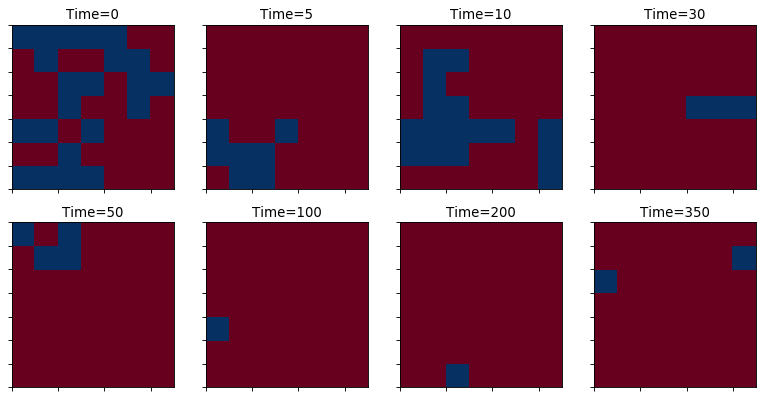

In [14]:
ising_model.simulate(1.8, boolean=True)

The lattice converges rapidly to the fully magnetized configuration: from epoch 100 to epoch 400 we see very similar patterns. \
As second step, we simulate the expected observables in range of $T \in [1.8,3]$, for 13 different temperatures. We set the $mcSteps = 2500$, which will be the states used for the means and $eqSteps = 150$ to evolve an initial random configuration to equilibrium.  

| At Temperature =1.80  <E>= -0.922  <M>= 0.950
| At Temperature =1.90  <E>= -0.899  <M>= 0.931
| At Temperature =2.00  <E>= -0.867  <M>= 0.908
| At Temperature =2.10  <E>= -0.839  <M>= 0.879
| At Temperature =2.20  <E>= -0.796  <M>= 0.842
| At Temperature =2.30  <E>= -0.717  <M>= 0.744
| At Temperature =2.40  <E>= -0.680  <M>= 0.709
| At Temperature =2.50  <E>= -0.614  <M>= 0.605
| At Temperature =2.60  <E>= -0.570  <M>= 0.550
| At Temperature =2.70  <E>= -0.489  <M>= 0.428
| At Temperature =2.80  <E>= -0.478  <M>= 0.425
| At Temperature =2.90  <E>= -0.443  <M>= 0.368
| At Temperature =3.00  <E>= -0.416  <M>= 0.342


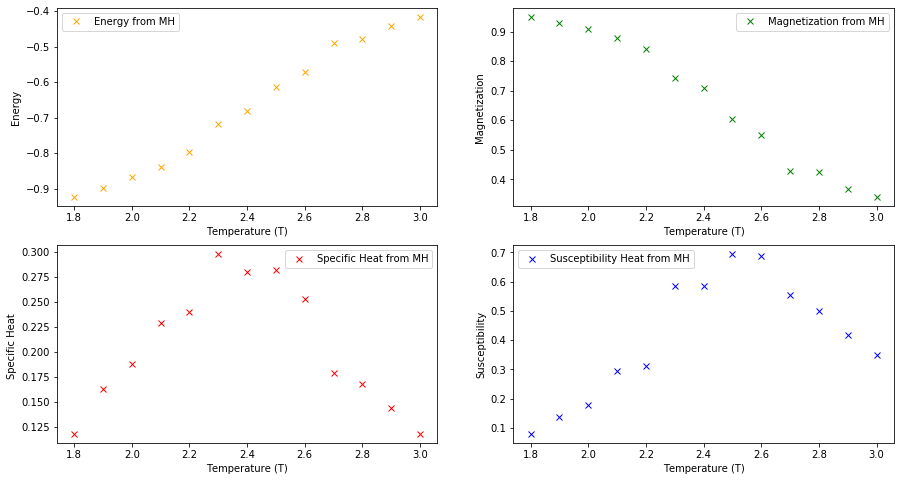

In [28]:
temp_isi, ene_isi, mag_isi, sh_isi, susc_isi = ising_model.obs_simulation(eqSteps=150, mcSteps=2500, tsteps= 13)

To test the predictions, we simulate the same for a larger lattice 20x20. 

| At Temperature =1.80  <E>= -0.932  <M>= 0.959
| At Temperature =1.85  <E>= -0.919  <M>= 0.950
| At Temperature =1.90  <E>= -0.906  <M>= 0.939
| At Temperature =1.94  <E>= -0.886  <M>= 0.920
| At Temperature =1.99  <E>= -0.875  <M>= 0.915
| At Temperature =2.04  <E>= -0.856  <M>= 0.898
| At Temperature =2.09  <E>= -0.832  <M>= 0.873
| At Temperature =2.14  <E>= -0.825  <M>= 0.869
| At Temperature =2.18  <E>= -0.746  <M>= 0.692
| At Temperature =2.23  <E>= -0.739  <M>= 0.685
| At Temperature =2.28  <E>= -0.688  <M>= 0.543
| At Temperature =2.33  <E>= -0.678  <M>= 0.618
| At Temperature =2.38  <E>= -0.605  <M>= 0.417
| At Temperature =2.42  <E>= -0.595  <M>= 0.394
| At Temperature =2.47  <E>= -0.582  <M>= 0.417
| At Temperature =2.52  <E>= -0.549  <M>= 0.274
| At Temperature =2.57  <E>= -0.533  <M>= 0.247
| At Temperature =2.62  <E>= -0.508  <M>= 0.217
| At Temperature =2.66  <E>= -0.491  <M>= 0.179
| At Temperature =2.71  <E>= -0.482  <M>= 0.201
| At Temperature =2.76  <E>= -0.463  <M>

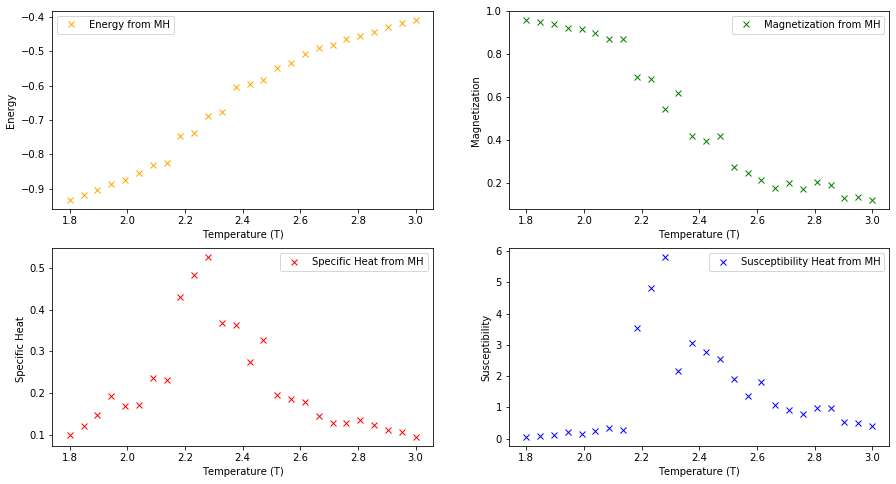

In [29]:
ising_model = isi.Ising(20)
# standard number of eqSteps and mcSteps
_ = ising_model.obs_simulation(tsteps=26,  )

## 2) RBMs 
We import from **main_module.py** the class RBM and AIS and GibbS functions. We slighty enlarge the RBM class to have the AIS_sample and the Gibbs_sample functions   

In [30]:
import rbm_classes as classes

Now we create a class containg a dictionary of all trained RBMs. The purpose is to simulate now the mean observables, to validate the fit, and to compute the correlation matrix.

In [31]:
mother_RBM = classes.mother_rbm(64,64)

# Istantiated  0  Rbms into dictionary.


Now we add the trained RBMs to the dictionary.

In [32]:
W = torch.load("rbms/W-18-final.b"); b = torch.load("rbms/b-18-final.b"); c = torch.load("rbms/c-18-final.b") 
mother_RBM.add(rbm18=[1.8, W, b, c])
W = torch.load("rbms/W-19-final.b"); b = torch.load("rbms/b-19-final.b"); c = torch.load("rbms/c-19-final.b") 
mother_RBM.add(rbm19=[1.9, W, b, c])
W = torch.load("rbms/W-20-final.b"); b = torch.load("rbms/b-20-final.b"); c = torch.load("rbms/c-20-final.b") 
mother_RBM.add(rbm20=[2.0, W, b, c])
W = torch.load("rbms/W-21-final.b"); b = torch.load("rbms/b-21-final.b"); c = torch.load("rbms/c-21-final.b") 
mother_RBM.add(rbm21=[2.1, W, b, c])
W = torch.load("rbms/W-22-final.b"); b = torch.load("rbms/b-22-final.b"); c = torch.load("rbms/c-22-final.b") 
mother_RBM.add(rbm22=[2.2, W, b, c])
W = torch.load("rbms/W-23-final.b"); b = torch.load("rbms/b-23-final.b"); c = torch.load("rbms/c-23-final.b") 
mother_RBM.add(rbm23=[2.3, W, b, c])
W = torch.load("rbms/W-24-final.b"); b = torch.load("rbms/b-24-final.b"); c = torch.load("rbms/c-24-final.b") 
mother_RBM.add(rbm24=[2.4, W, b, c])
W = torch.load("rbms/W-25-final.b"); b = torch.load("rbms/b-25-final.b"); c = torch.load("rbms/c-25-final.b") 
mother_RBM.add(rbm25=[2.5, W, b, c])
W = torch.load("rbms/W-26-final.b"); b = torch.load("rbms/b-26-final.b"); c = torch.load("rbms/c-26-final.b") 
mother_RBM.add(rbm26=[2.6, W, b, c])
W = torch.load("rbms/W-27-final.b"); b = torch.load("rbms/b-27-final.b"); c = torch.load("rbms/c-27-final.b") 
mother_RBM.add(rbm27=[2.7, W, b, c])
W = torch.load("rbms/W-28-final.b"); b = torch.load("rbms/b-28-final.b"); c = torch.load("rbms/c-28-final.b") 
mother_RBM.add(rbm28=[2.8, W, b, c])
W = torch.load("rbms/W-29-final.b"); b = torch.load("rbms/b-29-final.b"); c = torch.load("rbms/c-29-final.b") 
mother_RBM.add(rbm29=[2.9, W, b, c])
W = torch.load("rbms/W-30-final.b"); b = torch.load("rbms/b-30-final.b"); c = torch.load("rbms/c-30-final.b") 
mother_RBM.add(rbm30=[3.0, W, b, c])
print(mother_RBM)

Added rbm18 in mother_rbm.
Added rbm19 in mother_rbm.
Added rbm20 in mother_rbm.
Added rbm21 in mother_rbm.
Added rbm22 in mother_rbm.
Added rbm23 in mother_rbm.
Added rbm24 in mother_rbm.
Added rbm25 in mother_rbm.
Object mother_rbm for lattice 8**2, with labels ['rbm18', 'rbm19', 'rbm20', 'rbm21', 'rbm22', 'rbm23', 'rbm24', 'rbm25']


In [34]:
#Simulation of the observables
all_obs_AIS, ene_AIS, mag_AIS = mother_RBM.simulate_AIS(n_samples=10**3)
print("In AIS all_obs has shape: ",np.shape(all_obs_AIS)," ene has shape",np.shape(ene_AIS)," mag has shape: ",np.shape(mag_AIS))

all_obs_GIB, ene_GIB, mag_GIB = mother_RBM.simulate_GIB(n_samples=10**3)
print("In GIB all_obs has shape: ",np.shape(all_obs_GIB)," ene has shape",np.shape(ene_GIB)," mag has shape: ",np.shape(mag_GIB))

In AIS all_obs has shape:  (13, 4)  ene has shape (13, 1000)  mag has shape:  (13, 1000)
In GIB all_obs has shape:  (13, 4)  ene has shape (13, 1000)  mag has shape:  (13, 1000)


We have returned 6 lists: in the case of ene and mag we have 13 columns each of which has the simulated values for magnetization and energy. We proceed to plot at first the magnetization then the energy.

/home/emanuele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


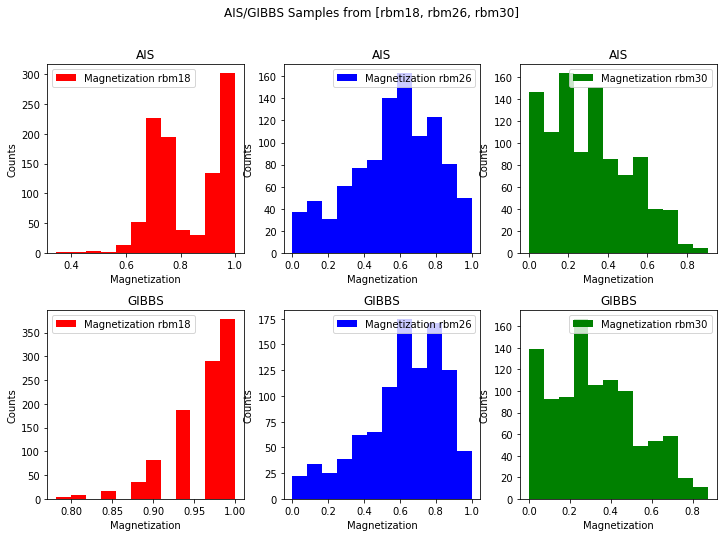

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(12,8))
fig.subplots_adjust(hspace= 0.3)

fig.suptitle('AIS/GIBBS Samples from [rbm18, rbm26, rbm30]')

######## AIS #########
ax1[0].hist(mag_AIS[0], bins=12, label="Magnetization rbm18", color="red")
ax1[0].set_ylabel("Counts")
ax1[0].set_xlabel("Magnetization")
#ax1.suptitle("rbm18")
ax1[0].legend()
ax1[0].set_title("AIS")

ax1[1].hist(mag_AIS[8], bins= 12, label="Magnetization rbm26", color="blue")
ax1[1].set_ylabel("Counts")
ax1[1].set_xlabel("Magnetization")
#ax2.suptitle("rbm26")
ax1[1].legend()
ax1[1].set_title("AIS")

ax1[2].hist(mag_AIS[12], bins= 12, label="Magnetization rbm30",color="green")
ax1[2].set_ylabel("Counts")
ax1[2].set_xlabel("Magnetization")
#ax3.suptitle("rbm30")
ax1[2].legend()
ax1[2].set_title("AIS")

######## GIBBS #########
ax2[0].hist(mag_GIB[0], bins=12, label="Magnetization rbm18", color="red")
ax2[0].set_ylabel("Counts")
ax2[0].set_xlabel("Magnetization")
#ax1.suptitle("rbm18")
ax2[0].legend()
ax2[0].set_title("GIBBS")

ax2[1].hist(mag_GIB[8], bins= 12, label="Magnetization rbm26", color="blue")
ax2[1].set_ylabel("Counts")
ax2[1].set_xlabel("Magnetization")
#ax2.suptitle("rbm26")
ax2[1].legend()
ax2[1].set_title("GIBBS")

ax2[2].hist(mag_GIB[12], bins= 12, label="Magnetization rbm30",color="green")
ax2[2].set_ylabel("Counts")
ax2[2].set_xlabel("Magnetization")
#ax3.suptitle("rbm30")
ax2[2].legend()
ax2[2].set_title("GIBBS")

fig.show()

/home/emanuele/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


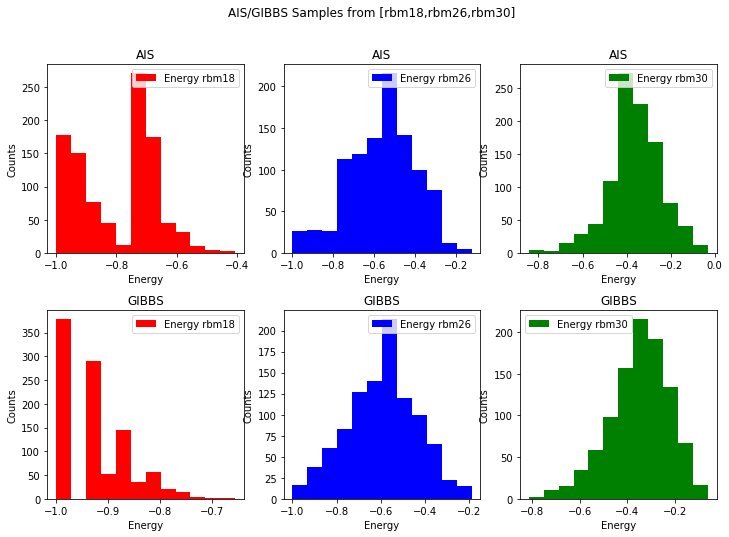

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 3, figsize=(12,8))
fig.subplots_adjust(hspace= 0.3)

fig.suptitle('AIS/GIBBS Samples from [rbm18,rbm26,rbm30]')


######## AIS #########
ax1[0].hist(ene_AIS[0], bins=12, label="Energy rbm18", color="red")
ax1[0].set_ylabel("Counts")
ax1[0].set_xlabel("Energy")
#ax1.suptitle("rbm18")
ax1[0].legend()
ax1[0].set_title("AIS")

ax1[1].hist(ene_AIS[8], bins= 12, label="Energy rbm26", color="blue")
ax1[1].set_ylabel("Counts")
ax1[1].set_xlabel("Energy")
#ax2.suptitle("rbm26")
ax1[1].legend()
ax1[1].set_title("AIS")

ax1[2].hist(ene_AIS[12], bins= 12, label="Energy rbm30",color="green")
ax1[2].set_ylabel("Counts")
ax1[2].set_xlabel("Energy")
#ax3.suptitle("rbm30")
ax1[2].legend()
ax1[2].set_title("AIS")

######## GIBBS #########
ax2[0].hist(ene_GIB[0], bins=12, label="Energy rbm18", color="red")
ax2[0].set_ylabel("Counts")
ax2[0].set_xlabel("Energy")
#ax1.suptitle("rbm18")
ax2[0].legend()
ax2[0].set_title("GIBBS")

ax2[1].hist(ene_GIB[8], bins= 12, label="Energy rbm26", color="blue")
ax2[1].set_ylabel("Counts")
ax2[1].set_xlabel("Energy")
#ax2.suptitle("rbm26")
ax2[1].legend()
ax2[1].set_title("GIBBS")

ax2[2].hist(ene_GIB[12], bins= 12, label="Energy rbm30",color="green")
ax2[2].set_ylabel("Counts")
ax2[2].set_xlabel("Energy")
#ax3.suptitle("rbm30")
ax2[2].legend()
ax2[2].set_title("GIBBS")

fig.show()

In [37]:
print("For the AIS method: ")
print(f"rbm18 -> Mean Energy: {np.mean(ene_AIS[0])}, Mean magnetization: {np.mean(mag_AIS[0])} ")
print(f"rbm26 -> Mean Energy: {np.mean(ene_AIS[8])}, Mean magnetization: {np.mean(mag_AIS[7])} ")
print(f"rbm30 -> Mean Energy: {np.mean(ene_AIS[12])}, Mean magnetization: {np.mean(mag_AIS[11])} ")

print("\nFor the GIBBS method: ")
print(f"rbm18 -> Mean Energy: {np.mean(ene_GIB[0])}, Mean magnetization: {np.mean(mag_GIB[0])} ")
print(f"rbm26 -> Mean Energy: {np.mean(ene_GIB[8])}, Mean magnetization: {np.mean(mag_GIB[7])} ")
print(f"rbm30 -> Mean Energy: {np.mean(ene_GIB[12])}, Mean magnetization: {np.mean(mag_GIB[11])} ")

For the AIS method: 
rbm18 -> Mean Energy: -0.8054375, Mean magnetization: 0.8311875 
rbm26 -> Mean Energy: -0.5649375, Mean magnetization: 0.4619375 
rbm30 -> Mean Energy: -0.361875, Mean magnetization: 0.321625 

For the GIBBS method: 
rbm18 -> Mean Energy: -0.93253125, Mean magnetization: 0.96253125 
rbm26 -> Mean Energy: -0.59484375, Mean magnetization: 0.562375 
rbm30 -> Mean Energy: -0.36465625, Mean magnetization: 0.27021875 


### Training Validation
Given the trained RBMs, we look at the mean values for energy and magnetization sorted from mother_rbm. We directly compare the result with the averaged values from the corresponding datasets and from MH simulation.

In [38]:
#read from file and plot
magneto_obs = []
magneto_obs.append(torch.load("obs/obs18.b"))
magneto_obs.append(torch.load("obs/obs19.b"))
magneto_obs.append(torch.load("obs/obs20.b"))
magneto_obs.append(torch.load("obs/obs21.b"))
magneto_obs.append(torch.load("obs/obs22.b"))
magneto_obs.append(torch.load("obs/obs23.b"))
magneto_obs.append(torch.load("obs/obs24.b"))
magneto_obs.append(torch.load("obs/obs25.b"))
magneto_obs.append(torch.load("obs/obs26.b"))
magneto_obs.append(torch.load("obs/obs27.b"))
magneto_obs.append(torch.load("obs/obs28.b"))
magneto_obs.append(torch.load("obs/obs29.b"))
magneto_obs.append(torch.load("obs/obs30.b"))

magneto_obs = np.asarray(magneto_obs)
np.shape(magneto_obs)

(13, 4)

We are plotting the mean observables. Specifically we look at the normalized energy $E_{i}/E_{i}^{(m)}$ and normalized magnetization $m_{i}/m_{i}^{(m)}$, where (m) refers to the value simulated by **magneto**. We plot also the Specific Heat and the Susceptibility.   

Text(0, 0.5, 'Normalized Susceptibility')

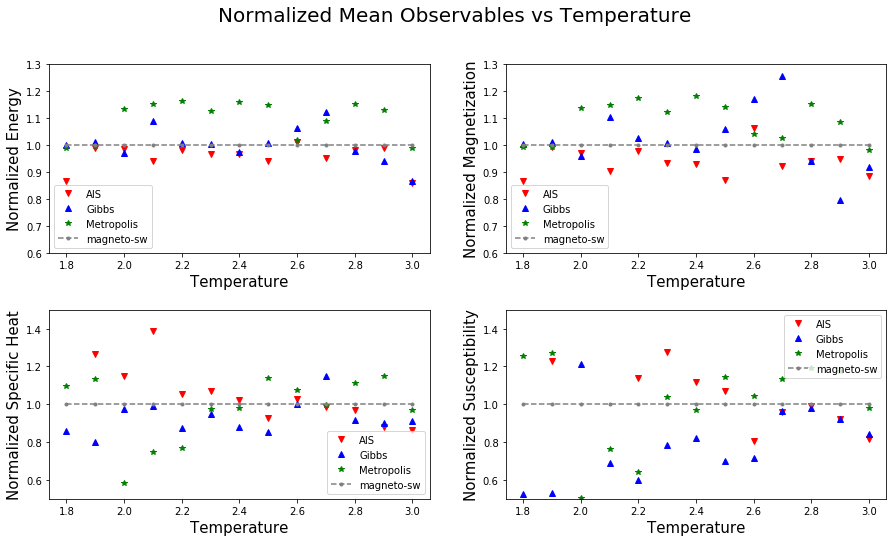

In [154]:
temp = np.linspace(1.8,3,13)

fig, (ax1,ax2) = plt.subplots(2,2, figsize=(15,8))
fig.subplots_adjust(hspace= 0.3)
fig.suptitle("Normalized Mean Observables vs Temperature", fontsize=20)

#Energy
ax1[0].plot(temp, np.divide(all_obs_AIS[:,0],magneto_obs[:,0]), linestyle="", color="red", marker="v", label="AIS" )
ax1[0].plot(temp, np.divide(all_obs_GIB[:,0],magneto_obs[:,0]), linestyle="", color="blue", marker="^", label="Gibbs")
ax1[0].plot(temp, np.divide(ene_isi[:,0],magneto_obs[:,0]), linestyle="", color="green", marker="*", label="Metropolis")
ax1[0].plot(temp, np.ones(len(temp)), linestyle="--", color="gray", marker=".", label="magneto-sw")
ax1[0].legend()
ax1[0].set_ylim(0.6,1.3)
ax1[0].set_xlabel("Temperature", fontsize=15)
ax1[0].set_ylabel("Normalized Energy", fontsize=15)

#Magnetization
ax1[1].plot(temp, np.divide(all_obs_AIS[:,1],magneto_obs[:,1]), linestyle="", color="red", marker="v", label="AIS" )
ax1[1].plot(temp, np.divide(all_obs_GIB[:,1],magneto_obs[:,1]), linestyle="", color="blue", marker="^", label="Gibbs")
ax1[1].plot(temp, np.divide(mag_isi[:,0],magneto_obs[:,1]), linestyle="", color="green", marker="*", label="Metropolis")
ax1[1].plot(temp, np.ones(len(temp)), linestyle="--", color="gray", marker=".", label="magneto-sw")
ax1[1].legend()
ax1[1].set_ylim(0.6,1.3)
ax1[1].set_xlabel("Temperature", fontsize=15)
ax1[1].set_ylabel("Normalized Magnetization",fontsize=15)

#Specific Heat
ax2[0].plot(temp,np.divide(all_obs_AIS[:,2],magneto_obs[:,2]) , linestyle="", color="red", marker="v", label="AIS" )
ax2[0].plot(temp, np.divide(all_obs_GIB[:,2],magneto_obs[:,2]) , linestyle="", color="blue", marker="^", label="Gibbs")
ax2[0].plot(temp, np.divide(sh_isi[:,0],magneto_obs[:,2])      , linestyle="", color="green", marker="*", label="Metropolis")
ax2[0].plot(temp, np.ones(13)   , linestyle="--", color="gray", marker=".", label="magneto-sw")
ax2[0].legend()
ax2[0].set_ylim(0.5,1.5)
ax2[0].set_xlabel("Temperature",  fontsize= 15)
ax2[0].set_ylabel("Normalized Specific Heat", fontsize=15)

#Susceptibility
ax2[1].plot(temp, np.divide(all_obs_AIS[:,3],magneto_obs[:,3]), linestyle="", color="red", marker="v", label="AIS" )
ax2[1].plot(temp, np.divide(all_obs_GIB[:,3],magneto_obs[:,3]) , linestyle="", color="blue", marker="^", label="Gibbs")
ax2[1].plot(temp, np.divide(susc_isi[:,0],magneto_obs[:,3])          , linestyle="", color="green", marker="*", label="Metropolis")
ax2[1].plot(temp, np.ones(13)   , linestyle="--", color="gray", marker=".", label="magneto-sw")
ax2[1].legend()
ax2[1].set_ylim(0.5,1.5)
ax2[1].set_xlabel("Temperature", fontsize=15)
ax2[1].set_ylabel("Normalized Susceptibility", fontsize=15)

Interesting enough, every mean observable  simulated by the RBM "rbm19", at T=1.9, is very close to the true observables, with respect to magneto. This RBM has been the only one that has been trained with transfer learning. We posed the weights for a trained rbm at T=1.8 and retrained over the dataset for T=1.9 for 2500 epochs. The result is also showd below with the correlation matrix

### Estimation of the Critical Temperature
We proceed from the trained rbm to estimate the critical temperature for the simulated datasets. We report the statistical error calculated with error propagation from the estimated values $A,B$ of the fitting curve $m(T|A,B) = \frac{1}{1+e^{AT+B}}$. \
**Note**\
The error calculated here for $T_C$ doesn't take in account of the standard deviations of the simulated data (AIS/GIBBS/MH), i.e. the curves has been fitted with the same standard deviation.   

Expected Tc from AIS: 2.567 pm 0.401
Expected Tc from GIBBS: 2.635 pm 0.380
Expected Tc from MH: 2.696 pm 0.142
Expected Tc from theory: 2.269


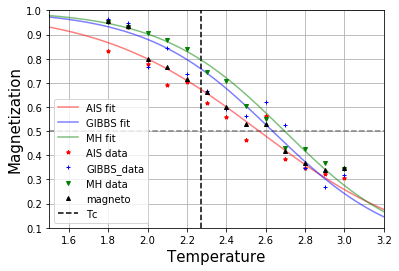

In [148]:
#Magnetization fit to critical Tc
#AIS case
magnet_AIS = np.log(1/(all_obs_AIS[:,1]) -1) 
[A_AIS, B_AIS], V_AIS = np.polyfit(temp, magnet_AIS, deg = 1, cov=True)

#GIBBS case
magnet_GIBBS = np.log(1/(all_obs_GIB[:,1]) -1) 
[A_GIBBS, B_GIBBS], V_GIBBS  = np.polyfit(temp, magnet_GIBBS, deg = 1, cov=True)

#MH case
magnet_MH = np.log(1/( mag_isi[:,0]) -1) 
[A_MH, B_MH], V_MH  = np.polyfit(temp, magnet_MH, deg = 1, cov=True)

#ERROR PROPAGATION
sigma_AIS   =np.abs(B_AIS/A_AIS)*np.sqrt(V_AIS[0,0]/A_AIS**2 + V_AIS[1,1]/B_AIS**2)
sigma_GIBBS =np.abs(B_GIBBS/A_GIBBS)*np.sqrt(V_GIBBS[0,0]/A_GIBBS**2 + V_GIBBS[1,1]/B_GIBBS**2)
sigma_MH    =np.abs(B_MH/A_MH)*np.sqrt(V_MH[0,0]/A_MH**2 + V_MH[1,1]/B_MH**2)

print("Expected Tc from AIS: %1.3f pm %.3f"%(np.abs(B_AIS/A_AIS),sigma_AIS ))
print("Expected Tc from GIBBS: %1.3f pm %.3f"%(np.abs(B_GIBBS/A_GIBBS), sigma_GIBBS) )
print("Expected Tc from MH: %1.3f pm %.3f"%(np.abs(B_MH/A_MH),sigma_MH) )
print("Expected Tc from theory: %1.3f" %(2/np.log(1+np.sqrt(2))))

################### FITTING ####################
t    = np.linspace(1.5,3.5,1000)
func1 = 1/(1+np.exp(A_AIS*t+B_AIS))
func2 = 1/(1+np.exp(A_GIBBS*t+B_GIBBS))
func3 = 1/(1+np.exp(A_MH*t+B_MH))
plt.plot(t, func1, label="AIS fit", color="red", alpha=0.5)
plt.plot(t, func2, label="GIBBS fit", color="blue", alpha=0.5)
plt.plot(t, func3, label="MH fit", color="green", alpha=0.5)
plt.vlines(2/np.log(1+np.sqrt(2)),0,1.5, linestyle="--", color="black", label="Tc")
plt.hlines(0.5,1.5,3.5, color="gray", linestyles="--" )
plt.plot(temp, all_obs_AIS[:,1],linestyle="", marker="*", label="AIS data",
         color="red", markersize=4 )
plt.plot(temp, all_obs_GIB[:,1],linestyle="", marker="+", label="GIBBS_data", 
         color="blue", markersize=4) 
plt.plot(temp, mag_isi[:,0], linestyle="", marker="v", label="MH data", 
         color="green", markersize=4 )
plt.plot(temp, magneto_obs[:,1],linestyle="", marker="^", label="magneto", 
         color="black", markersize=4)
plt.xlim(1.5,3.2)
plt.ylim(0.1,1)
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Magnetization", fontsize=15)
plt.grid()
plt.legend( )  
plt.show()

### Creation of the Correlations' Matrices
Here we implement the main code to calculate the correlations' matrix, given the rbm. 

In [43]:
#Calculating the correlaction matrix
def extract_coupling(rbm, L =36):
    H = torch.zeros(size=(L,L))
    for i in range(L):
        for j in range(L):
            num1  = 1 + torch.exp(rbm.c + rbm.W[:,i] +rbm.W[:,j])
            num2 = 1 + torch.exp(rbm.c)
            den1  = 1 + torch.exp(rbm.c + rbm.W[:,i])
            den2 = 1 + torch.exp(rbm.c + rbm.W[:,j])
            what   = torch.log( torch.div(torch.mul(num1, num1), torch.mul(den1,den2)) )
            H[i,j]= torch.sum(what)/18
    for i in range(L): H[i,i] = torch.min(H)

    return H

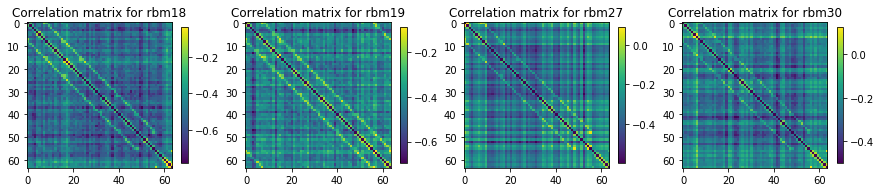

In [44]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(15,5))

H1 = extract_coupling(mother_RBM.machine["rbm18"], L =8**2)
H2 = extract_coupling(mother_RBM.machine["rbm19"], L =8**2)
H3 = extract_coupling(mother_RBM.machine["rbm27"], L =8**2)
H4 = extract_coupling(mother_RBM.machine["rbm30"], L =8**2)


im1 = ax1.imshow(np.asarray(H1))
ax1.set_title("Correlation matrix for rbm18")
fig.colorbar(im1, ax= ax1,  shrink=0.5)

im2 = ax2.imshow(np.asarray(H2))
ax2.set_title("Correlation matrix for rbm19")
fig.colorbar(im2, ax= ax2,  shrink=0.5)

im3 = ax3.imshow(np.asarray(H3))
ax3.set_title("Correlation matrix for rbm27")
fig.colorbar(im3, ax= ax3,  shrink=0.5)

im4 = ax4.imshow(np.asarray(H4))
ax4.set_title("Correlation matrix for rbm30")
fig.colorbar(im4, ax= ax4,  shrink=0.5)

### Example of Transfer Learning
To verify if it could be useful to train a RBM with transfer learning, we adopt the learned weights for "rbm19" to train in 1500 steps the "rbm18". We will then plot the expected correlation matrix. 

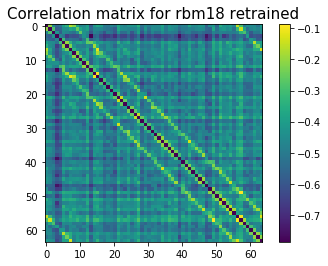

In [24]:
import main_module as mod
spins        = mod.txt_Ising_dataset("spins180.txt")
rbm_transfer = mother_RBM.machine["rbm19"] 

#compile before the next cell!
H1 = extract_coupling(rbm_transfer, L =8**2)
plt.imshow(np.asarray(H1))
plt.colorbar()
plt.title("Correlation matrix for rbm18 retrained", fontsize=15)
plt.show()

In [16]:
import progressbar as progressbar
#mod.train_rbm(rbm_transfer, spins.imgs, 1.8,nb_epoch=500, k_CD=1, lr=0.05, L=8,print_log=50)
loss, eps =mod.train_rbm(rbm_transfer, spins.imgs, 1.8,nb_epoch=1000, k_CD=5, lr=0.001, L=8,print_log=50)

  0% (1 of 1000) |                       | Elapsed Time: 0:00:11 ETA:   3:08:33

 | Loss:  tensor(0.1125)


  0% (2 of 1000) |                       | Elapsed Time: 0:00:22 ETA:   3:07:07

 | Loss:  tensor(0.1125)


  0% (3 of 1000) |                       | Elapsed Time: 0:00:34 ETA:   3:19:11

 | Loss:  tensor(0.1126)


  0% (4 of 1000) |                       | Elapsed Time: 0:00:45 ETA:   3:07:17

 | Loss:  tensor(0.1124)


  0% (5 of 1000) |                       | Elapsed Time: 0:00:57 ETA:   3:07:23

 | Loss:  tensor(0.1124)


  0% (6 of 1000) |                       | Elapsed Time: 0:01:08 ETA:   3:09:39

 | Loss:  tensor(0.1126)


  0% (7 of 1000) |                       | Elapsed Time: 0:01:20 ETA:   3:12:36

 | Loss:  tensor(0.1125)


  0% (8 of 1000) |                       | Elapsed Time: 0:01:32 ETA:   3:14:39

 | Loss:  tensor(0.1124)


  0% (9 of 1000) |                       | Elapsed Time: 0:01:43 ETA:   3:11:35

 | Loss:  tensor(0.1125)


  1% (10 of 1000) |                      | Elapsed Time: 0:01:55 ETA:   3:13:23

 | Loss:  tensor(0.1124)


  1% (11 of 1000) |                      | Elapsed Time: 0:02:07 ETA:   3:12:54

 | Loss:  tensor(0.1125)


  1% (12 of 1000) |                      | Elapsed Time: 0:02:18 ETA:   3:12:34

 | Loss:  tensor(0.1124)


  1% (13 of 1000) |                      | Elapsed Time: 0:02:30 ETA:   3:10:35

 | Loss:  tensor(0.1123)


  1% (14 of 1000) |                      | Elapsed Time: 0:02:41 ETA:   3:10:34

 | Loss:  tensor(0.1124)


  1% (15 of 1000) |                      | Elapsed Time: 0:02:53 ETA:   3:11:01

 | Loss:  tensor(0.1125)


  1% (16 of 1000) |                      | Elapsed Time: 0:03:05 ETA:   3:10:47

 | Loss:  tensor(0.1125)


  1% (17 of 1000) |                      | Elapsed Time: 0:03:16 ETA:   3:08:18

 | Loss:  tensor(0.1123)


  1% (18 of 1000) |                      | Elapsed Time: 0:03:28 ETA:   3:09:52

 | Loss:  tensor(0.1123)


  1% (19 of 1000) |                      | Elapsed Time: 0:03:39 ETA:   3:08:06

 | Loss:  tensor(0.1124)


  2% (20 of 1000) |                      | Elapsed Time: 0:03:51 ETA:   3:08:11

 | Loss:  tensor(0.1125)


  2% (21 of 1000) |                      | Elapsed Time: 0:04:02 ETA:   3:07:54

 | Loss:  tensor(0.1126)


  2% (22 of 1000) |                      | Elapsed Time: 0:04:14 ETA:   3:07:23

 | Loss:  tensor(0.1125)


  2% (23 of 1000) |                      | Elapsed Time: 0:04:25 ETA:   3:08:57

 | Loss:  tensor(0.1124)


  2% (24 of 1000) |                      | Elapsed Time: 0:04:37 ETA:   3:09:11

 | Loss:  tensor(0.1125)


  2% (25 of 1000) |                      | Elapsed Time: 0:04:49 ETA:   3:09:28

 | Loss:  tensor(0.1124)


  2% (26 of 1000) |                      | Elapsed Time: 0:05:00 ETA:   3:08:17

 | Loss:  tensor(0.1125)


  2% (27 of 1000) |                      | Elapsed Time: 0:05:12 ETA:   3:10:02

 | Loss:  tensor(0.1125)


  2% (28 of 1000) |                      | Elapsed Time: 0:05:24 ETA:   3:08:16

 | Loss:  tensor(0.1125)


  2% (29 of 1000) |                      | Elapsed Time: 0:05:35 ETA:   3:11:15

 | Loss:  tensor(0.1124)


  3% (30 of 1000) |                      | Elapsed Time: 0:05:47 ETA:   3:07:55

 | Loss:  tensor(0.1125)


  3% (31 of 1000) |                      | Elapsed Time: 0:05:59 ETA:   3:08:59

 | Loss:  tensor(0.1125)


  3% (32 of 1000) |                      | Elapsed Time: 0:06:11 ETA:   3:08:57

 | Loss:  tensor(0.1125)


  3% (33 of 1000) |                      | Elapsed Time: 0:06:22 ETA:   3:07:21

 | Loss:  tensor(0.1125)


  3% (34 of 1000) |                      | Elapsed Time: 0:06:34 ETA:   3:08:47

 | Loss:  tensor(0.1124)


  3% (35 of 1000) |                      | Elapsed Time: 0:06:46 ETA:   3:08:07

 | Loss:  tensor(0.1125)


  3% (36 of 1000) |                      | Elapsed Time: 0:06:57 ETA:   3:08:52

 | Loss:  tensor(0.1123)


  3% (37 of 1000) |                      | Elapsed Time: 0:07:09 ETA:   3:07:43

 | Loss:  tensor(0.1125)


  3% (38 of 1000) |                      | Elapsed Time: 0:07:21 ETA:   3:07:05

 | Loss:  tensor(0.1127)


  3% (39 of 1000) |                      | Elapsed Time: 0:07:32 ETA:   3:07:32

 | Loss:  tensor(0.1124)


  4% (40 of 1000) |                      | Elapsed Time: 0:07:44 ETA:   3:06:20

 | Loss:  tensor(0.1124)


  4% (41 of 1000) |                      | Elapsed Time: 0:07:56 ETA:   3:05:40

 | Loss:  tensor(0.1123)


  4% (42 of 1000) |                      | Elapsed Time: 0:08:07 ETA:   3:06:42

 | Loss:  tensor(0.1124)


  4% (43 of 1000) |                      | Elapsed Time: 0:08:19 ETA:   3:06:57

 | Loss:  tensor(0.1126)


  4% (44 of 1000) |                      | Elapsed Time: 0:08:31 ETA:   3:05:04

 | Loss:  tensor(0.1123)


  4% (45 of 1000) |                      | Elapsed Time: 0:08:42 ETA:   3:05:57

 | Loss:  tensor(0.1125)


  4% (46 of 1000) |#                     | Elapsed Time: 0:08:54 ETA:   3:05:36

 | Loss:  tensor(0.1126)


  4% (47 of 1000) |#                     | Elapsed Time: 0:09:06 ETA:   3:04:46

 | Loss:  tensor(0.1124)


  4% (48 of 1000) |#                     | Elapsed Time: 0:09:17 ETA:   3:03:00

 | Loss:  tensor(0.1125)


  4% (49 of 1000) |#                     | Elapsed Time: 0:09:29 ETA:   3:04:34

 | Loss:  tensor(0.1125)


  5% (50 of 1000) |#                     | Elapsed Time: 0:09:59 ETA:   8:01:31

 | Log_LH:  tensor(-21.8952)  | Loss:  tensor(0.1126)


  5% (51 of 1000) |#                     | Elapsed Time: 0:10:11 ETA:   3:03:33

 | Loss:  tensor(0.1124)


  5% (52 of 1000) |#                     | Elapsed Time: 0:10:22 ETA:   3:02:06

 | Loss:  tensor(0.1127)


  5% (53 of 1000) |#                     | Elapsed Time: 0:10:34 ETA:   3:02:00

 | Loss:  tensor(0.1124)


  5% (54 of 1000) |#                     | Elapsed Time: 0:10:46 ETA:   3:03:52

 | Loss:  tensor(0.1124)


  5% (55 of 1000) |#                     | Elapsed Time: 0:10:57 ETA:   3:03:15

 | Loss:  tensor(0.1125)


  5% (56 of 1000) |#                     | Elapsed Time: 0:11:09 ETA:   3:02:51

 | Loss:  tensor(0.1124)


  5% (57 of 1000) |#                     | Elapsed Time: 0:11:21 ETA:   3:03:37

 | Loss:  tensor(0.1126)


  5% (58 of 1000) |#                     | Elapsed Time: 0:11:32 ETA:   3:05:04

 | Loss:  tensor(0.1125)


  5% (59 of 1000) |#                     | Elapsed Time: 0:11:44 ETA:   3:03:24

 | Loss:  tensor(0.1125)


  6% (60 of 1000) |#                     | Elapsed Time: 0:11:56 ETA:   3:01:50

 | Loss:  tensor(0.1125)


  6% (61 of 1000) |#                     | Elapsed Time: 0:12:07 ETA:   3:02:48

 | Loss:  tensor(0.1124)


  6% (62 of 1000) |#                     | Elapsed Time: 0:12:19 ETA:   3:02:06

 | Loss:  tensor(0.1123)


  6% (63 of 1000) |#                     | Elapsed Time: 0:12:31 ETA:   3:02:23

 | Loss:  tensor(0.1126)


  6% (64 of 1000) |#                     | Elapsed Time: 0:12:42 ETA:   3:00:45

 | Loss:  tensor(0.1124)


  6% (65 of 1000) |#                     | Elapsed Time: 0:12:54 ETA:   3:02:36

 | Loss:  tensor(0.1124)


  6% (66 of 1000) |#                     | Elapsed Time: 0:13:06 ETA:   3:01:53

 | Loss:  tensor(0.1125)


  6% (67 of 1000) |#                     | Elapsed Time: 0:13:17 ETA:   3:01:37

 | Loss:  tensor(0.1125)


  6% (68 of 1000) |#                     | Elapsed Time: 0:13:29 ETA:   3:03:20

 | Loss:  tensor(0.1125)


  6% (69 of 1000) |#                     | Elapsed Time: 0:13:41 ETA:   3:01:34

 | Loss:  tensor(0.1123)


  7% (70 of 1000) |#                     | Elapsed Time: 0:13:52 ETA:   3:01:06

 | Loss:  tensor(0.1126)


  7% (71 of 1000) |#                     | Elapsed Time: 0:14:04 ETA:   3:00:53

 | Loss:  tensor(0.1126)


  7% (72 of 1000) |#                     | Elapsed Time: 0:14:16 ETA:   2:59:33

 | Loss:  tensor(0.1123)


  7% (73 of 1000) |#                     | Elapsed Time: 0:14:27 ETA:   2:58:05

 | Loss:  tensor(0.1125)


  7% (74 of 1000) |#                     | Elapsed Time: 0:14:39 ETA:   2:58:50

 | Loss:  tensor(0.1125)


  7% (75 of 1000) |#                     | Elapsed Time: 0:14:51 ETA:   2:59:45

 | Loss:  tensor(0.1125)


  7% (76 of 1000) |#                     | Elapsed Time: 0:15:02 ETA:   2:58:03

 | Loss:  tensor(0.1125)


  7% (77 of 1000) |#                     | Elapsed Time: 0:15:14 ETA:   2:56:28

 | Loss:  tensor(0.1124)


  7% (78 of 1000) |#                     | Elapsed Time: 0:15:25 ETA:   2:58:01

 | Loss:  tensor(0.1125)


  7% (79 of 1000) |#                     | Elapsed Time: 0:15:37 ETA:   2:58:45

 | Loss:  tensor(0.1126)


  8% (80 of 1000) |#                     | Elapsed Time: 0:15:48 ETA:   2:56:56

 | Loss:  tensor(0.1124)


  8% (81 of 1000) |#                     | Elapsed Time: 0:16:00 ETA:   2:57:32

 | Loss:  tensor(0.1126)


  8% (82 of 1000) |#                     | Elapsed Time: 0:16:12 ETA:   2:57:43

 | Loss:  tensor(0.1126)


  8% (83 of 1000) |#                     | Elapsed Time: 0:16:23 ETA:   2:56:53

 | Loss:  tensor(0.1123)


  8% (84 of 1000) |#                     | Elapsed Time: 0:16:35 ETA:   2:57:37

 | Loss:  tensor(0.1126)


  8% (85 of 1000) |#                     | Elapsed Time: 0:16:46 ETA:   2:57:40

 | Loss:  tensor(0.1124)


  8% (86 of 1000) |#                     | Elapsed Time: 0:16:58 ETA:   2:58:22

 | Loss:  tensor(0.1125)


  8% (87 of 1000) |#                     | Elapsed Time: 0:17:10 ETA:   2:56:40

 | Loss:  tensor(0.1124)


  8% (88 of 1000) |#                     | Elapsed Time: 0:17:21 ETA:   2:56:39

 | Loss:  tensor(0.1125)


  8% (89 of 1000) |#                     | Elapsed Time: 0:17:33 ETA:   2:58:51

 | Loss:  tensor(0.1124)


  9% (90 of 1000) |#                     | Elapsed Time: 0:17:45 ETA:   2:56:52

 | Loss:  tensor(0.1125)


  9% (91 of 1000) |##                    | Elapsed Time: 0:17:56 ETA:   2:56:52

 | Loss:  tensor(0.1124)


  9% (92 of 1000) |##                    | Elapsed Time: 0:18:08 ETA:   2:56:00

 | Loss:  tensor(0.1125)


  9% (93 of 1000) |##                    | Elapsed Time: 0:18:20 ETA:   2:56:29

 | Loss:  tensor(0.1125)


  9% (94 of 1000) |##                    | Elapsed Time: 0:18:31 ETA:   2:56:49

 | Loss:  tensor(0.1123)


  9% (95 of 1000) |##                    | Elapsed Time: 0:18:43 ETA:   2:56:09

 | Loss:  tensor(0.1124)


  9% (96 of 1000) |##                    | Elapsed Time: 0:18:55 ETA:   2:56:42

 | Loss:  tensor(0.1125)


  9% (97 of 1000) |##                    | Elapsed Time: 0:19:07 ETA:   2:55:45

 | Loss:  tensor(0.1125)


  9% (98 of 1000) |##                    | Elapsed Time: 0:19:18 ETA:   2:55:30

 | Loss:  tensor(0.1125)


  9% (99 of 1000) |##                    | Elapsed Time: 0:19:30 ETA:   2:57:37

 | Loss:  tensor(0.1125)


 10% (100 of 1000) |##                   | Elapsed Time: 0:20:01 ETA:   7:44:08

 | Log_LH:  tensor(-21.1218)  | Loss:  tensor(0.1125)


 10% (101 of 1000) |##                   | Elapsed Time: 0:20:13 ETA:   2:54:52

 | Loss:  tensor(0.1126)


 10% (102 of 1000) |##                   | Elapsed Time: 0:20:24 ETA:   2:55:55

 | Loss:  tensor(0.1126)


 10% (103 of 1000) |##                   | Elapsed Time: 0:20:36 ETA:   2:53:57

 | Loss:  tensor(0.1125)


 10% (104 of 1000) |##                   | Elapsed Time: 0:20:48 ETA:   2:53:10

 | Loss:  tensor(0.1125)


 10% (105 of 1000) |##                   | Elapsed Time: 0:20:59 ETA:   2:53:16

 | Loss:  tensor(0.1126)


 10% (106 of 1000) |##                   | Elapsed Time: 0:21:11 ETA:   2:51:59

 | Loss:  tensor(0.1126)


 10% (107 of 1000) |##                   | Elapsed Time: 0:21:22 ETA:   2:50:53

 | Loss:  tensor(0.1125)


 10% (108 of 1000) |##                   | Elapsed Time: 0:21:34 ETA:   2:53:15

 | Loss:  tensor(0.1125)


 10% (109 of 1000) |##                   | Elapsed Time: 0:21:46 ETA:   2:51:43

 | Loss:  tensor(0.1124)


 11% (110 of 1000) |##                   | Elapsed Time: 0:21:57 ETA:   2:51:37

 | Loss:  tensor(0.1126)


 11% (111 of 1000) |##                   | Elapsed Time: 0:22:09 ETA:   2:50:26

 | Loss:  tensor(0.1125)


 11% (112 of 1000) |##                   | Elapsed Time: 0:22:20 ETA:   2:51:13

 | Loss:  tensor(0.1124)


 11% (113 of 1000) |##                   | Elapsed Time: 0:22:32 ETA:   2:51:26

 | Loss:  tensor(0.1125)


 11% (114 of 1000) |##                   | Elapsed Time: 0:22:43 ETA:   2:51:24

 | Loss:  tensor(0.1123)


 11% (115 of 1000) |##                   | Elapsed Time: 0:22:55 ETA:   2:51:53

 | Loss:  tensor(0.1127)


 11% (116 of 1000) |##                   | Elapsed Time: 0:23:07 ETA:   2:52:35

 | Loss:  tensor(0.1125)


 11% (117 of 1000) |##                   | Elapsed Time: 0:23:18 ETA:   2:51:45

 | Loss:  tensor(0.1125)


 11% (118 of 1000) |##                   | Elapsed Time: 0:23:30 ETA:   2:53:30

 | Loss:  tensor(0.1124)


 11% (119 of 1000) |##                   | Elapsed Time: 0:23:42 ETA:   2:51:03

 | Loss:  tensor(0.1125)


 12% (120 of 1000) |##                   | Elapsed Time: 0:23:54 ETA:   2:52:05

 | Loss:  tensor(0.1125)


 12% (121 of 1000) |##                   | Elapsed Time: 0:24:05 ETA:   2:51:29

 | Loss:  tensor(0.1126)


 12% (122 of 1000) |##                   | Elapsed Time: 0:24:17 ETA:   2:50:34

 | Loss:  tensor(0.1124)


 12% (123 of 1000) |##                   | Elapsed Time: 0:24:29 ETA:   2:51:06

 | Loss:  tensor(0.1127)


 12% (124 of 1000) |##                   | Elapsed Time: 0:24:40 ETA:   2:50:44

 | Loss:  tensor(0.1126)


 12% (125 of 1000) |##                   | Elapsed Time: 0:24:52 ETA:   2:50:35

 | Loss:  tensor(0.1126)


 12% (126 of 1000) |##                   | Elapsed Time: 0:25:04 ETA:   2:49:32

 | Loss:  tensor(0.1124)


 12% (127 of 1000) |##                   | Elapsed Time: 0:25:15 ETA:   2:50:07

 | Loss:  tensor(0.1125)


 12% (128 of 1000) |##                   | Elapsed Time: 0:25:27 ETA:   2:51:09

 | Loss:  tensor(0.1126)


 12% (129 of 1000) |##                   | Elapsed Time: 0:25:39 ETA:   2:50:03

 | Loss:  tensor(0.1126)


 13% (130 of 1000) |##                   | Elapsed Time: 0:25:50 ETA:   2:48:04

 | Loss:  tensor(0.1125)


 13% (131 of 1000) |##                   | Elapsed Time: 0:26:02 ETA:   2:48:42

 | Loss:  tensor(0.1125)


 13% (132 of 1000) |##                   | Elapsed Time: 0:26:14 ETA:   2:48:01

 | Loss:  tensor(0.1125)


 13% (133 of 1000) |##                   | Elapsed Time: 0:26:25 ETA:   2:48:37

 | Loss:  tensor(0.1124)


 13% (134 of 1000) |##                   | Elapsed Time: 0:26:37 ETA:   2:47:54

 | Loss:  tensor(0.1125)


 13% (135 of 1000) |##                   | Elapsed Time: 0:26:49 ETA:   2:47:36

 | Loss:  tensor(0.1124)


 13% (136 of 1000) |##                   | Elapsed Time: 0:27:00 ETA:   2:46:46

 | Loss:  tensor(0.1124)


 13% (137 of 1000) |##                   | Elapsed Time: 0:27:12 ETA:   2:46:58

 | Loss:  tensor(0.1127)


 13% (138 of 1000) |##                   | Elapsed Time: 0:27:23 ETA:   2:46:55

 | Loss:  tensor(0.1126)


 13% (139 of 1000) |##                   | Elapsed Time: 0:27:35 ETA:   2:47:42

 | Loss:  tensor(0.1126)


 14% (140 of 1000) |##                   | Elapsed Time: 0:27:47 ETA:   2:45:04

 | Loss:  tensor(0.1126)


 14% (141 of 1000) |##                   | Elapsed Time: 0:27:58 ETA:   2:43:52

 | Loss:  tensor(0.1126)


 14% (142 of 1000) |##                   | Elapsed Time: 0:28:10 ETA:   2:44:09

 | Loss:  tensor(0.1125)


 14% (143 of 1000) |###                  | Elapsed Time: 0:28:21 ETA:   2:44:45

 | Loss:  tensor(0.1126)


 14% (144 of 1000) |###                  | Elapsed Time: 0:28:33 ETA:   2:45:17

 | Loss:  tensor(0.1125)


 14% (145 of 1000) |###                  | Elapsed Time: 0:28:44 ETA:   2:45:22

 | Loss:  tensor(0.1125)


 14% (146 of 1000) |###                  | Elapsed Time: 0:28:56 ETA:   2:45:02

 | Loss:  tensor(0.1125)


 14% (147 of 1000) |###                  | Elapsed Time: 0:29:08 ETA:   2:44:34

 | Loss:  tensor(0.1125)


 14% (148 of 1000) |###                  | Elapsed Time: 0:29:19 ETA:   2:45:31

 | Loss:  tensor(0.1126)


 14% (149 of 1000) |###                  | Elapsed Time: 0:29:31 ETA:   2:46:53

 | Loss:  tensor(0.1124)


 15% (150 of 1000) |###                  | Elapsed Time: 0:30:02 ETA:   7:17:49

 | Log_LH:  tensor(-21.0334)  | Loss:  tensor(0.1126)


 15% (151 of 1000) |###                  | Elapsed Time: 0:30:14 ETA:   2:46:10

 | Loss:  tensor(0.1125)


 15% (152 of 1000) |###                  | Elapsed Time: 0:30:25 ETA:   2:45:13

 | Loss:  tensor(0.1125)


 15% (153 of 1000) |###                  | Elapsed Time: 0:30:37 ETA:   2:45:11

 | Loss:  tensor(0.1125)


 15% (154 of 1000) |###                  | Elapsed Time: 0:30:49 ETA:   2:45:11

 | Loss:  tensor(0.1124)


 15% (155 of 1000) |###                  | Elapsed Time: 0:31:00 ETA:   2:45:29

 | Loss:  tensor(0.1125)


 15% (156 of 1000) |###                  | Elapsed Time: 0:31:12 ETA:   2:43:32

 | Loss:  tensor(0.1124)


 15% (157 of 1000) |###                  | Elapsed Time: 0:31:24 ETA:   2:43:54

 | Loss:  tensor(0.1125)


 15% (158 of 1000) |###                  | Elapsed Time: 0:31:35 ETA:   2:44:28

 | Loss:  tensor(0.1127)


 15% (159 of 1000) |###                  | Elapsed Time: 0:31:47 ETA:   2:43:58

 | Loss:  tensor(0.1125)


 16% (160 of 1000) |###                  | Elapsed Time: 0:31:59 ETA:   2:43:55

 | Loss:  tensor(0.1126)


 16% (161 of 1000) |###                  | Elapsed Time: 0:32:11 ETA:   2:43:20

 | Loss:  tensor(0.1126)


 16% (162 of 1000) |###                  | Elapsed Time: 0:32:22 ETA:   2:43:17

 | Loss:  tensor(0.1125)


 16% (163 of 1000) |###                  | Elapsed Time: 0:32:34 ETA:   2:43:02

 | Loss:  tensor(0.1125)


 16% (164 of 1000) |###                  | Elapsed Time: 0:32:46 ETA:   2:42:11

 | Loss:  tensor(0.1126)


 16% (165 of 1000) |###                  | Elapsed Time: 0:32:57 ETA:   2:42:50

 | Loss:  tensor(0.1126)


 16% (166 of 1000) |###                  | Elapsed Time: 0:33:09 ETA:   2:41:40

 | Loss:  tensor(0.1126)


 16% (167 of 1000) |###                  | Elapsed Time: 0:33:21 ETA:   2:41:30

 | Loss:  tensor(0.1126)


 16% (168 of 1000) |###                  | Elapsed Time: 0:33:32 ETA:   2:43:33

 | Loss:  tensor(0.1125)


 16% (169 of 1000) |###                  | Elapsed Time: 0:33:44 ETA:   2:41:36

 | Loss:  tensor(0.1126)


 17% (170 of 1000) |###                  | Elapsed Time: 0:33:56 ETA:   2:40:41

 | Loss:  tensor(0.1125)


 17% (171 of 1000) |###                  | Elapsed Time: 0:34:07 ETA:   2:40:31

 | Loss:  tensor(0.1125)


 17% (172 of 1000) |###                  | Elapsed Time: 0:34:19 ETA:   2:39:29

 | Loss:  tensor(0.1126)


 17% (173 of 1000) |###                  | Elapsed Time: 0:34:30 ETA:   2:37:30

 | Loss:  tensor(0.1125)


 17% (174 of 1000) |###                  | Elapsed Time: 0:34:42 ETA:   2:38:10

 | Loss:  tensor(0.1125)


 17% (175 of 1000) |###                  | Elapsed Time: 0:34:53 ETA:   2:38:07

 | Loss:  tensor(0.1126)


 17% (176 of 1000) |###                  | Elapsed Time: 0:35:05 ETA:   2:43:26

 | Loss:  tensor(0.1125)


 17% (177 of 1000) |###                  | Elapsed Time: 0:35:17 ETA:   2:42:58

 | Loss:  tensor(0.1125)


 17% (178 of 1000) |###                  | Elapsed Time: 0:35:29 ETA:   2:46:51

 | Loss:  tensor(0.1124)


 17% (179 of 1000) |###                  | Elapsed Time: 0:35:41 ETA:   2:44:15

 | Loss:  tensor(0.1127)


 18% (180 of 1000) |###                  | Elapsed Time: 0:35:53 ETA:   2:42:25

 | Loss:  tensor(0.1125)


 18% (181 of 1000) |###                  | Elapsed Time: 0:36:05 ETA:   2:45:53

 | Loss:  tensor(0.1125)


 18% (182 of 1000) |###                  | Elapsed Time: 0:36:17 ETA:   2:44:23

 | Loss:  tensor(0.1125)


 18% (183 of 1000) |###                  | Elapsed Time: 0:36:29 ETA:   2:44:02

 | Loss:  tensor(0.1124)


 18% (184 of 1000) |###                  | Elapsed Time: 0:36:41 ETA:   2:43:45

 | Loss:  tensor(0.1126)


 18% (185 of 1000) |###                  | Elapsed Time: 0:36:53 ETA:   2:43:44

 | Loss:  tensor(0.1125)


 18% (186 of 1000) |###                  | Elapsed Time: 0:37:05 ETA:   2:43:21

 | Loss:  tensor(0.1125)


 18% (187 of 1000) |###                  | Elapsed Time: 0:37:18 ETA:   2:43:35

 | Loss:  tensor(0.1126)


 18% (188 of 1000) |###                  | Elapsed Time: 0:37:30 ETA:   2:45:45

 | Loss:  tensor(0.1125)


 18% (189 of 1000) |###                  | Elapsed Time: 0:37:42 ETA:   2:43:30

 | Loss:  tensor(0.1124)


 19% (190 of 1000) |###                  | Elapsed Time: 0:37:54 ETA:   2:43:44

 | Loss:  tensor(0.1126)


 19% (191 of 1000) |####                 | Elapsed Time: 0:38:06 ETA:   2:44:18

 | Loss:  tensor(0.1126)


 19% (192 of 1000) |####                 | Elapsed Time: 0:38:18 ETA:   2:43:00

 | Loss:  tensor(0.1125)


 19% (193 of 1000) |####                 | Elapsed Time: 0:38:30 ETA:   2:40:27

 | Loss:  tensor(0.1125)


 19% (194 of 1000) |####                 | Elapsed Time: 0:38:42 ETA:   2:42:36

 | Loss:  tensor(0.1125)


 19% (195 of 1000) |####                 | Elapsed Time: 0:38:54 ETA:   2:42:34

 | Loss:  tensor(0.1125)


 19% (196 of 1000) |####                 | Elapsed Time: 0:39:07 ETA:   2:42:56

 | Loss:  tensor(0.1126)


 19% (197 of 1000) |####                 | Elapsed Time: 0:39:19 ETA:   2:41:56

 | Loss:  tensor(0.1123)


 19% (198 of 1000) |####                 | Elapsed Time: 0:39:31 ETA:   2:42:57

 | Loss:  tensor(0.1126)


 19% (199 of 1000) |####                 | Elapsed Time: 0:39:43 ETA:   2:40:13

 | Loss:  tensor(0.1125)


 20% (200 of 1000) |####                 | Elapsed Time: 0:40:15 ETA:   7:05:04

 | Log_LH:  tensor(-20.5545)  | Loss:  tensor(0.1125)


 20% (201 of 1000) |####                 | Elapsed Time: 0:40:27 ETA:   2:39:33

 | Loss:  tensor(0.1126)


 20% (202 of 1000) |####                 | Elapsed Time: 0:40:39 ETA:   2:39:27

 | Loss:  tensor(0.1125)


 20% (203 of 1000) |####                 | Elapsed Time: 0:40:51 ETA:   2:37:47

 | Loss:  tensor(0.1126)


 20% (204 of 1000) |####                 | Elapsed Time: 0:41:03 ETA:   2:38:31

 | Loss:  tensor(0.1125)


 20% (205 of 1000) |####                 | Elapsed Time: 0:41:14 ETA:   2:37:15

 | Loss:  tensor(0.1126)


 20% (206 of 1000) |####                 | Elapsed Time: 0:41:26 ETA:   2:38:38

 | Loss:  tensor(0.1126)


 20% (207 of 1000) |####                 | Elapsed Time: 0:41:38 ETA:   2:36:29

 | Loss:  tensor(0.1126)


 20% (208 of 1000) |####                 | Elapsed Time: 0:41:50 ETA:   2:37:18

 | Loss:  tensor(0.1125)


 20% (209 of 1000) |####                 | Elapsed Time: 0:42:02 ETA:   2:36:27

 | Loss:  tensor(0.1125)


 21% (210 of 1000) |####                 | Elapsed Time: 0:42:14 ETA:   2:37:24

 | Loss:  tensor(0.1125)


 21% (211 of 1000) |####                 | Elapsed Time: 0:42:26 ETA:   2:37:14

 | Loss:  tensor(0.1124)


 21% (212 of 1000) |####                 | Elapsed Time: 0:42:38 ETA:   2:37:21

 | Loss:  tensor(0.1125)


 21% (213 of 1000) |####                 | Elapsed Time: 0:42:50 ETA:   2:36:30

 | Loss:  tensor(0.1126)


 21% (214 of 1000) |####                 | Elapsed Time: 0:43:02 ETA:   2:36:45

 | Loss:  tensor(0.1124)


 21% (215 of 1000) |####                 | Elapsed Time: 0:43:14 ETA:   2:36:50

 | Loss:  tensor(0.1126)


 21% (216 of 1000) |####                 | Elapsed Time: 0:43:26 ETA:   2:38:19

 | Loss:  tensor(0.1125)


 21% (217 of 1000) |####                 | Elapsed Time: 0:43:38 ETA:   2:36:19

 | Loss:  tensor(0.1125)


 21% (218 of 1000) |####                 | Elapsed Time: 0:43:50 ETA:   2:35:51

 | Loss:  tensor(0.1125)


 21% (219 of 1000) |####                 | Elapsed Time: 0:44:02 ETA:   2:36:04

 | Loss:  tensor(0.1126)


 22% (220 of 1000) |####                 | Elapsed Time: 0:44:14 ETA:   2:36:14

 | Loss:  tensor(0.1124)


 22% (221 of 1000) |####                 | Elapsed Time: 0:44:26 ETA:   2:34:30

 | Loss:  tensor(0.1125)


 22% (222 of 1000) |####                 | Elapsed Time: 0:44:38 ETA:   2:35:45

 | Loss:  tensor(0.1125)


 22% (223 of 1000) |####                 | Elapsed Time: 0:44:50 ETA:   2:35:42

 | Loss:  tensor(0.1125)


 22% (224 of 1000) |####                 | Elapsed Time: 0:45:02 ETA:   2:35:18

 | Loss:  tensor(0.1125)


 22% (225 of 1000) |####                 | Elapsed Time: 0:45:14 ETA:   2:34:38

 | Loss:  tensor(0.1126)


 22% (226 of 1000) |####                 | Elapsed Time: 0:45:26 ETA:   2:36:53

 | Loss:  tensor(0.1125)


 22% (227 of 1000) |####                 | Elapsed Time: 0:45:38 ETA:   2:35:23

 | Loss:  tensor(0.1124)


 22% (228 of 1000) |####                 | Elapsed Time: 0:45:50 ETA:   2:34:28

 | Loss:  tensor(0.1126)


 22% (229 of 1000) |####                 | Elapsed Time: 0:46:02 ETA:   2:33:22

 | Loss:  tensor(0.1126)


 23% (230 of 1000) |####                 | Elapsed Time: 0:46:14 ETA:   2:33:17

 | Loss:  tensor(0.1125)


 23% (231 of 1000) |####                 | Elapsed Time: 0:46:26 ETA:   2:33:27

 | Loss:  tensor(0.1126)


 23% (232 of 1000) |####                 | Elapsed Time: 0:46:38 ETA:   2:32:46

 | Loss:  tensor(0.1125)


 23% (233 of 1000) |####                 | Elapsed Time: 0:46:50 ETA:   2:33:20

 | Loss:  tensor(0.1126)


 23% (234 of 1000) |####                 | Elapsed Time: 0:47:02 ETA:   2:31:49

 | Loss:  tensor(0.1124)


 23% (235 of 1000) |####                 | Elapsed Time: 0:47:14 ETA:   2:31:16

 | Loss:  tensor(0.1125)


 23% (236 of 1000) |####                 | Elapsed Time: 0:47:26 ETA:   2:31:58

 | Loss:  tensor(0.1125)


 23% (237 of 1000) |####                 | Elapsed Time: 0:47:37 ETA:   2:30:48

 | Loss:  tensor(0.1126)


 23% (238 of 1000) |####                 | Elapsed Time: 0:47:49 ETA:   2:30:29

 | Loss:  tensor(0.1126)


 23% (239 of 1000) |#####                | Elapsed Time: 0:48:01 ETA:   2:31:22

 | Loss:  tensor(0.1127)


 24% (240 of 1000) |#####                | Elapsed Time: 0:48:13 ETA:   2:30:54

 | Loss:  tensor(0.1123)


 24% (241 of 1000) |#####                | Elapsed Time: 0:48:25 ETA:   2:30:40

 | Loss:  tensor(0.1125)


 24% (242 of 1000) |#####                | Elapsed Time: 0:48:37 ETA:   2:31:09

 | Loss:  tensor(0.1126)


 24% (243 of 1000) |#####                | Elapsed Time: 0:48:49 ETA:   2:30:41

 | Loss:  tensor(0.1125)


 24% (244 of 1000) |#####                | Elapsed Time: 0:49:01 ETA:   2:31:10

 | Loss:  tensor(0.1125)


 24% (245 of 1000) |#####                | Elapsed Time: 0:49:13 ETA:   2:30:48

 | Loss:  tensor(0.1125)


 24% (246 of 1000) |#####                | Elapsed Time: 0:49:25 ETA:   2:32:29

 | Loss:  tensor(0.1125)


 24% (247 of 1000) |#####                | Elapsed Time: 0:49:37 ETA:   2:32:43

 | Loss:  tensor(0.1124)


 24% (248 of 1000) |#####                | Elapsed Time: 0:49:49 ETA:   2:30:56

 | Loss:  tensor(0.1125)


 24% (249 of 1000) |#####                | Elapsed Time: 0:50:01 ETA:   2:33:16

 | Loss:  tensor(0.1126)


 25% (250 of 1000) |#####                | Elapsed Time: 0:50:33 ETA:   6:39:19

 | Log_LH:  tensor(-20.3046)  | Loss:  tensor(0.1126)


 25% (251 of 1000) |#####                | Elapsed Time: 0:50:48 ETA:   3:07:35

 | Loss:  tensor(0.1125)


 25% (252 of 1000) |#####                | Elapsed Time: 0:51:00 ETA:   2:24:51

 | Loss:  tensor(0.1126)


 25% (253 of 1000) |#####                | Elapsed Time: 0:51:12 ETA:   2:25:24

 | Loss:  tensor(0.1126)


 25% (254 of 1000) |#####                | Elapsed Time: 0:51:23 ETA:   2:24:27

 | Loss:  tensor(0.1125)


 25% (255 of 1000) |#####                | Elapsed Time: 0:51:35 ETA:   2:26:42

 | Loss:  tensor(0.1128)


 25% (256 of 1000) |#####                | Elapsed Time: 0:51:47 ETA:   2:24:44

 | Loss:  tensor(0.1126)


 25% (257 of 1000) |#####                | Elapsed Time: 0:51:59 ETA:   2:24:06

 | Loss:  tensor(0.1125)


 25% (258 of 1000) |#####                | Elapsed Time: 0:52:10 ETA:   2:24:05

 | Loss:  tensor(0.1126)


 25% (259 of 1000) |#####                | Elapsed Time: 0:52:22 ETA:   2:23:25

 | Loss:  tensor(0.1125)


 26% (260 of 1000) |#####                | Elapsed Time: 0:52:33 ETA:   2:23:40

 | Loss:  tensor(0.1125)


 26% (261 of 1000) |#####                | Elapsed Time: 0:52:45 ETA:   2:24:47

 | Loss:  tensor(0.1126)


 26% (262 of 1000) |#####                | Elapsed Time: 0:52:57 ETA:   2:22:35

 | Loss:  tensor(0.1123)


 26% (263 of 1000) |#####                | Elapsed Time: 0:53:08 ETA:   2:23:24

 | Loss:  tensor(0.1126)


 26% (264 of 1000) |#####                | Elapsed Time: 0:53:20 ETA:   2:22:30

 | Loss:  tensor(0.1125)


 26% (265 of 1000) |#####                | Elapsed Time: 0:53:32 ETA:   2:24:05

 | Loss:  tensor(0.1123)


 26% (266 of 1000) |#####                | Elapsed Time: 0:53:43 ETA:   2:21:32

 | Loss:  tensor(0.1126)


 26% (267 of 1000) |#####                | Elapsed Time: 0:53:55 ETA:   2:20:21

 | Loss:  tensor(0.1126)


 26% (268 of 1000) |#####                | Elapsed Time: 0:54:06 ETA:   2:20:52

 | Loss:  tensor(0.1126)


 26% (269 of 1000) |#####                | Elapsed Time: 0:54:18 ETA:   2:20:58

 | Loss:  tensor(0.1125)


 27% (270 of 1000) |#####                | Elapsed Time: 0:54:30 ETA:   2:21:05

 | Loss:  tensor(0.1125)


 27% (271 of 1000) |#####                | Elapsed Time: 0:54:41 ETA:   2:20:56

 | Loss:  tensor(0.1126)


 27% (272 of 1000) |#####                | Elapsed Time: 0:54:53 ETA:   2:19:54

 | Loss:  tensor(0.1124)


 27% (273 of 1000) |#####                | Elapsed Time: 0:55:04 ETA:   2:21:16

 | Loss:  tensor(0.1125)


 27% (274 of 1000) |#####                | Elapsed Time: 0:55:16 ETA:   2:20:38

 | Loss:  tensor(0.1125)


 27% (275 of 1000) |#####                | Elapsed Time: 0:55:28 ETA:   2:22:49

 | Loss:  tensor(0.1124)


 27% (276 of 1000) |#####                | Elapsed Time: 0:55:40 ETA:   2:21:54

 | Loss:  tensor(0.1126)


 27% (277 of 1000) |#####                | Elapsed Time: 0:55:51 ETA:   2:20:32

 | Loss:  tensor(0.1125)


 27% (278 of 1000) |#####                | Elapsed Time: 0:56:03 ETA:   2:21:02

 | Loss:  tensor(0.1127)


 27% (279 of 1000) |#####                | Elapsed Time: 0:56:15 ETA:   2:21:04

 | Loss:  tensor(0.1124)


 28% (280 of 1000) |#####                | Elapsed Time: 0:56:26 ETA:   2:19:49

 | Loss:  tensor(0.1126)


 28% (281 of 1000) |#####                | Elapsed Time: 0:56:38 ETA:   2:19:17

 | Loss:  tensor(0.1125)


 28% (282 of 1000) |#####                | Elapsed Time: 0:56:50 ETA:   2:19:13

 | Loss:  tensor(0.1126)


 28% (283 of 1000) |#####                | Elapsed Time: 0:57:01 ETA:   2:19:36

 | Loss:  tensor(0.1126)


 28% (284 of 1000) |#####                | Elapsed Time: 0:57:13 ETA:   2:20:21

 | Loss:  tensor(0.1127)


 28% (285 of 1000) |#####                | Elapsed Time: 0:57:25 ETA:   2:20:14

 | Loss:  tensor(0.1124)


 28% (286 of 1000) |######               | Elapsed Time: 0:57:37 ETA:   2:20:37

 | Loss:  tensor(0.1127)


 28% (287 of 1000) |######               | Elapsed Time: 0:57:48 ETA:   2:18:09

 | Loss:  tensor(0.1124)


 28% (288 of 1000) |######               | Elapsed Time: 0:58:00 ETA:   2:18:01

 | Loss:  tensor(0.1125)


 28% (289 of 1000) |######               | Elapsed Time: 0:58:12 ETA:   2:18:38

 | Loss:  tensor(0.1125)


 29% (290 of 1000) |######               | Elapsed Time: 0:58:23 ETA:   2:18:00

 | Loss:  tensor(0.1125)


 29% (291 of 1000) |######               | Elapsed Time: 0:58:35 ETA:   2:17:11

 | Loss:  tensor(0.1126)


 29% (292 of 1000) |######               | Elapsed Time: 0:58:47 ETA:   2:17:31

 | Loss:  tensor(0.1124)


 29% (293 of 1000) |######               | Elapsed Time: 0:58:58 ETA:   2:17:40

 | Loss:  tensor(0.1126)


 29% (294 of 1000) |######               | Elapsed Time: 0:59:10 ETA:   2:17:24

 | Loss:  tensor(0.1127)


 29% (295 of 1000) |######               | Elapsed Time: 0:59:22 ETA:   2:16:25

 | Loss:  tensor(0.1123)


 29% (296 of 1000) |######               | Elapsed Time: 0:59:33 ETA:   2:17:39

 | Loss:  tensor(0.1127)


 29% (297 of 1000) |######               | Elapsed Time: 0:59:45 ETA:   2:15:48

 | Loss:  tensor(0.1126)


 29% (298 of 1000) |######               | Elapsed Time: 0:59:56 ETA:   2:15:28

 | Loss:  tensor(0.1125)


 29% (299 of 1000) |######               | Elapsed Time: 1:00:08 ETA:   2:14:59

 | Loss:  tensor(0.1126)


 30% (300 of 1000) |######               | Elapsed Time: 1:00:38 ETA:   5:55:44

 | Log_LH:  tensor(-19.7288)  | Loss:  tensor(0.1126)


 30% (301 of 1000) |######               | Elapsed Time: 1:00:50 ETA:   2:13:42

 | Loss:  tensor(0.1126)


 30% (302 of 1000) |######               | Elapsed Time: 1:01:02 ETA:   2:14:29

 | Loss:  tensor(0.1125)


 30% (303 of 1000) |######               | Elapsed Time: 1:01:13 ETA:   2:14:25

 | Loss:  tensor(0.1123)


 30% (304 of 1000) |######               | Elapsed Time: 1:01:25 ETA:   2:15:18

 | Loss:  tensor(0.1127)


 30% (305 of 1000) |######               | Elapsed Time: 1:01:36 ETA:   2:15:29

 | Loss:  tensor(0.1128)


 30% (306 of 1000) |######               | Elapsed Time: 1:01:48 ETA:   2:14:19

 | Loss:  tensor(0.1127)


 30% (307 of 1000) |######               | Elapsed Time: 1:02:00 ETA:   2:13:58

 | Loss:  tensor(0.1126)


 30% (308 of 1000) |######               | Elapsed Time: 1:02:11 ETA:   2:14:16

 | Loss:  tensor(0.1127)


 30% (309 of 1000) |######               | Elapsed Time: 1:02:23 ETA:   2:14:59

 | Loss:  tensor(0.1126)


 31% (310 of 1000) |######               | Elapsed Time: 1:02:35 ETA:   2:14:43

 | Loss:  tensor(0.1125)


 31% (311 of 1000) |######               | Elapsed Time: 1:02:46 ETA:   2:13:57

 | Loss:  tensor(0.1126)


 31% (312 of 1000) |######               | Elapsed Time: 1:02:58 ETA:   2:14:44

 | Loss:  tensor(0.1125)


 31% (313 of 1000) |######               | Elapsed Time: 1:03:10 ETA:   2:12:52

 | Loss:  tensor(0.1124)


 31% (314 of 1000) |######               | Elapsed Time: 1:03:21 ETA:   2:13:43

 | Loss:  tensor(0.1126)


 31% (315 of 1000) |######               | Elapsed Time: 1:03:33 ETA:   2:13:57

 | Loss:  tensor(0.1125)


 31% (316 of 1000) |######               | Elapsed Time: 1:03:45 ETA:   2:13:21

 | Loss:  tensor(0.1127)


 31% (317 of 1000) |######               | Elapsed Time: 1:03:57 ETA:   2:12:38

 | Loss:  tensor(0.1124)


 31% (318 of 1000) |######               | Elapsed Time: 1:04:08 ETA:   2:12:14

 | Loss:  tensor(0.1127)


 31% (319 of 1000) |######               | Elapsed Time: 1:04:20 ETA:   2:12:33

 | Loss:  tensor(0.1126)


 32% (320 of 1000) |######               | Elapsed Time: 1:04:31 ETA:   2:11:47

 | Loss:  tensor(0.1125)


 32% (321 of 1000) |######               | Elapsed Time: 1:04:43 ETA:   2:11:06

 | Loss:  tensor(0.1126)


 32% (322 of 1000) |######               | Elapsed Time: 1:04:55 ETA:   2:11:55

 | Loss:  tensor(0.1126)


 32% (323 of 1000) |######               | Elapsed Time: 1:05:06 ETA:   2:11:05

 | Loss:  tensor(0.1125)


 32% (324 of 1000) |######               | Elapsed Time: 1:05:18 ETA:   2:10:59

 | Loss:  tensor(0.1127)


 32% (325 of 1000) |######               | Elapsed Time: 1:05:30 ETA:   2:13:59

 | Loss:  tensor(0.1125)


 32% (326 of 1000) |######               | Elapsed Time: 1:05:42 ETA:   2:10:47

 | Loss:  tensor(0.1126)


 32% (327 of 1000) |######               | Elapsed Time: 1:05:53 ETA:   2:09:52

 | Loss:  tensor(0.1125)


 32% (328 of 1000) |######               | Elapsed Time: 1:06:05 ETA:   2:10:17

 | Loss:  tensor(0.1125)


 32% (329 of 1000) |######               | Elapsed Time: 1:06:16 ETA:   2:10:19

 | Loss:  tensor(0.1127)


 33% (330 of 1000) |######               | Elapsed Time: 1:06:28 ETA:   2:09:58

 | Loss:  tensor(0.1126)


 33% (331 of 1000) |######               | Elapsed Time: 1:06:40 ETA:   2:09:25

 | Loss:  tensor(0.1126)


 33% (332 of 1000) |######               | Elapsed Time: 1:06:51 ETA:   2:08:17

 | Loss:  tensor(0.1126)


 33% (333 of 1000) |######               | Elapsed Time: 1:07:03 ETA:   2:08:08

 | Loss:  tensor(0.1126)


 33% (334 of 1000) |#######              | Elapsed Time: 1:07:14 ETA:   2:07:36

 | Loss:  tensor(0.1125)


 33% (335 of 1000) |#######              | Elapsed Time: 1:07:26 ETA:   2:08:55

 | Loss:  tensor(0.1127)


 33% (336 of 1000) |#######              | Elapsed Time: 1:07:37 ETA:   2:07:30

 | Loss:  tensor(0.1125)


 33% (337 of 1000) |#######              | Elapsed Time: 1:07:49 ETA:   2:07:21

 | Loss:  tensor(0.1125)


 33% (338 of 1000) |#######              | Elapsed Time: 1:08:00 ETA:   2:07:24

 | Loss:  tensor(0.1125)


 33% (339 of 1000) |#######              | Elapsed Time: 1:08:12 ETA:   2:07:25

 | Loss:  tensor(0.1125)


 34% (340 of 1000) |#######              | Elapsed Time: 1:08:24 ETA:   2:07:05

 | Loss:  tensor(0.1125)


 34% (341 of 1000) |#######              | Elapsed Time: 1:08:35 ETA:   2:07:51

 | Loss:  tensor(0.1126)


 34% (342 of 1000) |#######              | Elapsed Time: 1:08:47 ETA:   2:07:06

 | Loss:  tensor(0.1125)


 34% (343 of 1000) |#######              | Elapsed Time: 1:08:58 ETA:   2:06:43

 | Loss:  tensor(0.1127)


 34% (344 of 1000) |#######              | Elapsed Time: 1:09:10 ETA:   2:07:52

 | Loss:  tensor(0.1125)


 34% (345 of 1000) |#######              | Elapsed Time: 1:09:22 ETA:   2:06:39

 | Loss:  tensor(0.1124)


 34% (346 of 1000) |#######              | Elapsed Time: 1:09:33 ETA:   2:09:06

 | Loss:  tensor(0.1125)


 34% (347 of 1000) |#######              | Elapsed Time: 1:09:45 ETA:   2:06:44

 | Loss:  tensor(0.1127)


 34% (348 of 1000) |#######              | Elapsed Time: 1:09:57 ETA:   2:06:40

 | Loss:  tensor(0.1127)


 34% (349 of 1000) |#######              | Elapsed Time: 1:10:09 ETA:   2:07:16

 | Loss:  tensor(0.1124)


 35% (350 of 1000) |#######              | Elapsed Time: 1:10:40 ETA:   5:36:05

 | Log_LH:  tensor(-19.4562)  | Loss:  tensor(0.1126)


 35% (351 of 1000) |#######              | Elapsed Time: 1:10:51 ETA:   2:06:16

 | Loss:  tensor(0.1126)


 35% (352 of 1000) |#######              | Elapsed Time: 1:11:03 ETA:   2:05:30

 | Loss:  tensor(0.1126)


 35% (353 of 1000) |#######              | Elapsed Time: 1:11:15 ETA:   2:05:47

 | Loss:  tensor(0.1125)


 35% (354 of 1000) |#######              | Elapsed Time: 1:11:26 ETA:   2:06:01

 | Loss:  tensor(0.1126)


 35% (355 of 1000) |#######              | Elapsed Time: 1:11:38 ETA:   2:04:59

 | Loss:  tensor(0.1126)


 35% (356 of 1000) |#######              | Elapsed Time: 1:11:50 ETA:   2:05:31

 | Loss:  tensor(0.1127)


 35% (357 of 1000) |#######              | Elapsed Time: 1:12:01 ETA:   2:04:48

 | Loss:  tensor(0.1126)


 35% (358 of 1000) |#######              | Elapsed Time: 1:12:13 ETA:   2:04:05

 | Loss:  tensor(0.1124)


 35% (359 of 1000) |#######              | Elapsed Time: 1:12:24 ETA:   2:03:56

 | Loss:  tensor(0.1128)


 36% (360 of 1000) |#######              | Elapsed Time: 1:12:36 ETA:   2:03:37

 | Loss:  tensor(0.1126)


 36% (361 of 1000) |#######              | Elapsed Time: 1:12:48 ETA:   2:02:53

 | Loss:  tensor(0.1125)


 36% (362 of 1000) |#######              | Elapsed Time: 1:12:59 ETA:   2:02:53

 | Loss:  tensor(0.1124)


 36% (363 of 1000) |#######              | Elapsed Time: 1:13:11 ETA:   2:02:47

 | Loss:  tensor(0.1125)


 36% (364 of 1000) |#######              | Elapsed Time: 1:13:22 ETA:   2:02:29

 | Loss:  tensor(0.1126)


 36% (365 of 1000) |#######              | Elapsed Time: 1:13:34 ETA:   2:03:06

 | Loss:  tensor(0.1126)


 36% (366 of 1000) |#######              | Elapsed Time: 1:13:45 ETA:   2:01:35

 | Loss:  tensor(0.1125)


 36% (367 of 1000) |#######              | Elapsed Time: 1:13:57 ETA:   2:00:51

 | Loss:  tensor(0.1126)


 36% (368 of 1000) |#######              | Elapsed Time: 1:14:08 ETA:   2:01:23

 | Loss:  tensor(0.1125)


 36% (369 of 1000) |#######              | Elapsed Time: 1:14:20 ETA:   2:01:36

 | Loss:  tensor(0.1127)


 37% (370 of 1000) |#######              | Elapsed Time: 1:14:31 ETA:   2:01:17

 | Loss:  tensor(0.1125)


 37% (371 of 1000) |#######              | Elapsed Time: 1:14:43 ETA:   2:00:58

 | Loss:  tensor(0.1124)


 37% (372 of 1000) |#######              | Elapsed Time: 1:14:55 ETA:   2:01:30

 | Loss:  tensor(0.1127)


 37% (373 of 1000) |#######              | Elapsed Time: 1:15:06 ETA:   2:01:26

 | Loss:  tensor(0.1126)


 37% (374 of 1000) |#######              | Elapsed Time: 1:15:18 ETA:   2:01:22

 | Loss:  tensor(0.1126)


 37% (375 of 1000) |#######              | Elapsed Time: 1:15:30 ETA:   2:02:46

 | Loss:  tensor(0.1126)


 37% (376 of 1000) |#######              | Elapsed Time: 1:15:41 ETA:   2:01:31

 | Loss:  tensor(0.1125)


 37% (377 of 1000) |#######              | Elapsed Time: 1:15:53 ETA:   2:00:56

 | Loss:  tensor(0.1126)


 37% (378 of 1000) |#######              | Elapsed Time: 1:16:05 ETA:   2:00:49

 | Loss:  tensor(0.1126)


 37% (379 of 1000) |#######              | Elapsed Time: 1:16:16 ETA:   2:00:45

 | Loss:  tensor(0.1126)


 38% (380 of 1000) |#######              | Elapsed Time: 1:16:28 ETA:   2:00:06

 | Loss:  tensor(0.1127)


 38% (381 of 1000) |########             | Elapsed Time: 1:16:40 ETA:   2:00:54

 | Loss:  tensor(0.1126)


 38% (382 of 1000) |########             | Elapsed Time: 1:16:51 ETA:   2:00:03

 | Loss:  tensor(0.1127)


 38% (383 of 1000) |########             | Elapsed Time: 1:17:03 ETA:   1:59:45

 | Loss:  tensor(0.1127)


 38% (384 of 1000) |########             | Elapsed Time: 1:17:15 ETA:   2:00:13

 | Loss:  tensor(0.1125)


 38% (385 of 1000) |########             | Elapsed Time: 1:17:27 ETA:   2:02:03

 | Loss:  tensor(0.1126)


 38% (386 of 1000) |########             | Elapsed Time: 1:17:38 ETA:   1:59:24

 | Loss:  tensor(0.1125)


 38% (387 of 1000) |########             | Elapsed Time: 1:17:50 ETA:   1:58:58

 | Loss:  tensor(0.1126)


 38% (388 of 1000) |########             | Elapsed Time: 1:18:01 ETA:   1:57:57

 | Loss:  tensor(0.1125)


 38% (389 of 1000) |########             | Elapsed Time: 1:18:13 ETA:   1:57:57

 | Loss:  tensor(0.1127)


 39% (390 of 1000) |########             | Elapsed Time: 1:18:25 ETA:   1:58:40

 | Loss:  tensor(0.1125)


 39% (391 of 1000) |########             | Elapsed Time: 1:18:36 ETA:   1:57:47

 | Loss:  tensor(0.1123)


 39% (392 of 1000) |########             | Elapsed Time: 1:18:48 ETA:   1:57:15

 | Loss:  tensor(0.1126)


 39% (393 of 1000) |########             | Elapsed Time: 1:18:59 ETA:   1:56:41

 | Loss:  tensor(0.1126)


 39% (394 of 1000) |########             | Elapsed Time: 1:19:11 ETA:   1:56:28

 | Loss:  tensor(0.1125)


 39% (395 of 1000) |########             | Elapsed Time: 1:19:23 ETA:   1:57:22

 | Loss:  tensor(0.1126)


 39% (396 of 1000) |########             | Elapsed Time: 1:19:34 ETA:   1:58:34

 | Loss:  tensor(0.1126)


 39% (397 of 1000) |########             | Elapsed Time: 1:19:46 ETA:   1:55:56

 | Loss:  tensor(0.1126)


 39% (398 of 1000) |########             | Elapsed Time: 1:19:57 ETA:   1:55:41

 | Loss:  tensor(0.1125)


 39% (399 of 1000) |########             | Elapsed Time: 1:20:09 ETA:   1:56:26

 | Loss:  tensor(0.1124)


 40% (400 of 1000) |########             | Elapsed Time: 1:20:40 ETA:   5:05:36

 | Log_LH:  tensor(-19.5674)  | Loss:  tensor(0.1126)


 40% (401 of 1000) |########             | Elapsed Time: 1:20:51 ETA:   1:55:56

 | Loss:  tensor(0.1126)


 40% (402 of 1000) |########             | Elapsed Time: 1:21:03 ETA:   1:55:31

 | Loss:  tensor(0.1125)


 40% (403 of 1000) |########             | Elapsed Time: 1:21:14 ETA:   1:55:54

 | Loss:  tensor(0.1127)


 40% (404 of 1000) |########             | Elapsed Time: 1:21:26 ETA:   1:57:06

 | Loss:  tensor(0.1125)


 40% (405 of 1000) |########             | Elapsed Time: 1:21:38 ETA:   1:55:55

 | Loss:  tensor(0.1126)


 40% (406 of 1000) |########             | Elapsed Time: 1:21:50 ETA:   1:55:26

 | Loss:  tensor(0.1126)


 40% (407 of 1000) |########             | Elapsed Time: 1:22:01 ETA:   1:55:13

 | Loss:  tensor(0.1126)


 40% (408 of 1000) |########             | Elapsed Time: 1:22:13 ETA:   1:55:05

 | Loss:  tensor(0.1125)


 40% (409 of 1000) |########             | Elapsed Time: 1:22:25 ETA:   1:55:23

 | Loss:  tensor(0.1127)


 41% (410 of 1000) |########             | Elapsed Time: 1:22:36 ETA:   1:54:26

 | Loss:  tensor(0.1125)


 41% (411 of 1000) |########             | Elapsed Time: 1:22:48 ETA:   1:54:24

 | Loss:  tensor(0.1125)


 41% (412 of 1000) |########             | Elapsed Time: 1:23:00 ETA:   1:54:36

 | Loss:  tensor(0.1125)


 41% (413 of 1000) |########             | Elapsed Time: 1:23:11 ETA:   1:53:57

 | Loss:  tensor(0.1125)


 41% (414 of 1000) |########             | Elapsed Time: 1:23:23 ETA:   1:53:26

 | Loss:  tensor(0.1127)


 41% (415 of 1000) |########             | Elapsed Time: 1:23:35 ETA:   1:56:19

 | Loss:  tensor(0.1126)


 41% (416 of 1000) |########             | Elapsed Time: 1:23:46 ETA:   1:53:58

 | Loss:  tensor(0.1126)


 41% (417 of 1000) |########             | Elapsed Time: 1:23:58 ETA:   1:53:05

 | Loss:  tensor(0.1125)


 41% (418 of 1000) |########             | Elapsed Time: 1:24:10 ETA:   1:53:34

 | Loss:  tensor(0.1127)


 41% (419 of 1000) |########             | Elapsed Time: 1:24:21 ETA:   1:52:15

 | Loss:  tensor(0.1127)


 42% (420 of 1000) |########             | Elapsed Time: 1:24:33 ETA:   1:52:12

 | Loss:  tensor(0.1125)


 42% (421 of 1000) |########             | Elapsed Time: 1:24:45 ETA:   1:52:45

 | Loss:  tensor(0.1127)


 42% (422 of 1000) |########             | Elapsed Time: 1:24:56 ETA:   1:51:42

 | Loss:  tensor(0.1125)


 42% (423 of 1000) |########             | Elapsed Time: 1:25:08 ETA:   1:51:23

 | Loss:  tensor(0.1124)


 42% (424 of 1000) |########             | Elapsed Time: 1:25:20 ETA:   1:51:14

 | Loss:  tensor(0.1125)


 42% (425 of 1000) |########             | Elapsed Time: 1:25:31 ETA:   1:53:10

 | Loss:  tensor(0.1126)


 42% (426 of 1000) |########             | Elapsed Time: 1:25:43 ETA:   1:51:53

 | Loss:  tensor(0.1126)


 42% (427 of 1000) |########             | Elapsed Time: 1:25:55 ETA:   1:49:59

 | Loss:  tensor(0.1125)


 42% (428 of 1000) |########             | Elapsed Time: 1:26:06 ETA:   1:49:39

 | Loss:  tensor(0.1124)


 42% (429 of 1000) |#########            | Elapsed Time: 1:26:17 ETA:   1:49:05

 | Loss:  tensor(0.1125)


 43% (430 of 1000) |#########            | Elapsed Time: 1:26:29 ETA:   1:49:04

 | Loss:  tensor(0.1126)


 43% (431 of 1000) |#########            | Elapsed Time: 1:26:40 ETA:   1:48:47

 | Loss:  tensor(0.1125)


 43% (432 of 1000) |#########            | Elapsed Time: 1:26:52 ETA:   1:49:54

 | Loss:  tensor(0.1125)


 43% (433 of 1000) |#########            | Elapsed Time: 1:27:04 ETA:   1:48:46

 | Loss:  tensor(0.1125)


 43% (434 of 1000) |#########            | Elapsed Time: 1:27:15 ETA:   1:49:10

 | Loss:  tensor(0.1125)


 43% (435 of 1000) |#########            | Elapsed Time: 1:27:27 ETA:   1:51:07

 | Loss:  tensor(0.1127)


 43% (436 of 1000) |#########            | Elapsed Time: 1:27:39 ETA:   1:49:38

 | Loss:  tensor(0.1126)


 43% (437 of 1000) |#########            | Elapsed Time: 1:27:50 ETA:   1:49:00

 | Loss:  tensor(0.1126)


 43% (438 of 1000) |#########            | Elapsed Time: 1:28:02 ETA:   1:49:20

 | Loss:  tensor(0.1126)


 43% (439 of 1000) |#########            | Elapsed Time: 1:28:14 ETA:   1:49:19

 | Loss:  tensor(0.1126)


 44% (440 of 1000) |#########            | Elapsed Time: 1:28:25 ETA:   1:48:34

 | Loss:  tensor(0.1126)


 44% (441 of 1000) |#########            | Elapsed Time: 1:28:37 ETA:   1:48:25

 | Loss:  tensor(0.1126)


 44% (442 of 1000) |#########            | Elapsed Time: 1:28:49 ETA:   1:49:08

 | Loss:  tensor(0.1125)


 44% (443 of 1000) |#########            | Elapsed Time: 1:29:00 ETA:   1:47:47

 | Loss:  tensor(0.1125)


 44% (444 of 1000) |#########            | Elapsed Time: 1:29:12 ETA:   1:47:40

 | Loss:  tensor(0.1125)


 44% (445 of 1000) |#########            | Elapsed Time: 1:29:24 ETA:   1:48:11

 | Loss:  tensor(0.1125)


 44% (446 of 1000) |#########            | Elapsed Time: 1:29:35 ETA:   1:50:01

 | Loss:  tensor(0.1125)


 44% (447 of 1000) |#########            | Elapsed Time: 1:29:47 ETA:   1:47:38

 | Loss:  tensor(0.1125)


 44% (448 of 1000) |#########            | Elapsed Time: 1:29:59 ETA:   1:47:47

 | Loss:  tensor(0.1126)


 44% (449 of 1000) |#########            | Elapsed Time: 1:30:10 ETA:   1:46:27

 | Loss:  tensor(0.1126)


 45% (450 of 1000) |#########            | Elapsed Time: 1:30:41 ETA:   4:44:05

 | Log_LH:  tensor(-19.5383)  | Loss:  tensor(0.1128)


 45% (451 of 1000) |#########            | Elapsed Time: 1:30:53 ETA:   1:46:07

 | Loss:  tensor(0.1124)


 45% (452 of 1000) |#########            | Elapsed Time: 1:31:05 ETA:   1:46:34

 | Loss:  tensor(0.1127)


 45% (453 of 1000) |#########            | Elapsed Time: 1:31:16 ETA:   1:45:07

 | Loss:  tensor(0.1124)


 45% (454 of 1000) |#########            | Elapsed Time: 1:31:28 ETA:   1:47:31

 | Loss:  tensor(0.1127)


 45% (455 of 1000) |#########            | Elapsed Time: 1:31:40 ETA:   1:45:59

 | Loss:  tensor(0.1127)


 45% (456 of 1000) |#########            | Elapsed Time: 1:31:51 ETA:   1:44:55

 | Loss:  tensor(0.1126)


 45% (457 of 1000) |#########            | Elapsed Time: 1:32:03 ETA:   1:45:15

 | Loss:  tensor(0.1126)


 45% (458 of 1000) |#########            | Elapsed Time: 1:32:14 ETA:   1:44:16

 | Loss:  tensor(0.1124)


 45% (459 of 1000) |#########            | Elapsed Time: 1:32:26 ETA:   1:43:29

 | Loss:  tensor(0.1126)


 46% (460 of 1000) |#########            | Elapsed Time: 1:32:37 ETA:   1:43:24

 | Loss:  tensor(0.1125)


 46% (461 of 1000) |#########            | Elapsed Time: 1:32:49 ETA:   1:42:59

 | Loss:  tensor(0.1125)


 46% (462 of 1000) |#########            | Elapsed Time: 1:33:00 ETA:   1:43:44

 | Loss:  tensor(0.1125)


 46% (463 of 1000) |#########            | Elapsed Time: 1:33:12 ETA:   1:43:01

 | Loss:  tensor(0.1127)


 46% (464 of 1000) |#########            | Elapsed Time: 1:33:23 ETA:   1:42:50

 | Loss:  tensor(0.1124)


 46% (465 of 1000) |#########            | Elapsed Time: 1:33:35 ETA:   1:45:31

 | Loss:  tensor(0.1126)


 46% (466 of 1000) |#########            | Elapsed Time: 1:33:47 ETA:   1:43:27

 | Loss:  tensor(0.1127)


 46% (467 of 1000) |#########            | Elapsed Time: 1:33:59 ETA:   1:43:17

 | Loss:  tensor(0.1125)


 46% (468 of 1000) |#########            | Elapsed Time: 1:34:10 ETA:   1:42:37

 | Loss:  tensor(0.1125)


 46% (469 of 1000) |#########            | Elapsed Time: 1:34:22 ETA:   1:42:41

 | Loss:  tensor(0.1126)


 47% (470 of 1000) |#########            | Elapsed Time: 1:34:33 ETA:   1:42:28

 | Loss:  tensor(0.1126)


 47% (471 of 1000) |#########            | Elapsed Time: 1:34:45 ETA:   1:42:47

 | Loss:  tensor(0.1124)


 47% (472 of 1000) |#########            | Elapsed Time: 1:34:57 ETA:   1:42:19

 | Loss:  tensor(0.1126)


 47% (473 of 1000) |#########            | Elapsed Time: 1:35:08 ETA:   1:42:12

 | Loss:  tensor(0.1126)


 47% (474 of 1000) |#########            | Elapsed Time: 1:35:20 ETA:   1:41:30

 | Loss:  tensor(0.1125)


 47% (475 of 1000) |#########            | Elapsed Time: 1:35:32 ETA:   1:44:24

 | Loss:  tensor(0.1126)


 47% (476 of 1000) |#########            | Elapsed Time: 1:35:43 ETA:   1:42:16

 | Loss:  tensor(0.1124)


 47% (477 of 1000) |##########           | Elapsed Time: 1:35:55 ETA:   1:40:52

 | Loss:  tensor(0.1127)


 47% (478 of 1000) |##########           | Elapsed Time: 1:36:07 ETA:   1:41:36

 | Loss:  tensor(0.1126)


 47% (479 of 1000) |##########           | Elapsed Time: 1:36:18 ETA:   1:41:32

 | Loss:  tensor(0.1127)


 48% (480 of 1000) |##########           | Elapsed Time: 1:36:30 ETA:   1:40:13

 | Loss:  tensor(0.1124)


 48% (481 of 1000) |##########           | Elapsed Time: 1:36:42 ETA:   1:40:33

 | Loss:  tensor(0.1126)


 48% (482 of 1000) |##########           | Elapsed Time: 1:36:53 ETA:   1:40:42

 | Loss:  tensor(0.1126)


 48% (483 of 1000) |##########           | Elapsed Time: 1:37:05 ETA:   1:39:56

 | Loss:  tensor(0.1126)


 48% (484 of 1000) |##########           | Elapsed Time: 1:37:16 ETA:   1:39:35

 | Loss:  tensor(0.1129)


 48% (485 of 1000) |##########           | Elapsed Time: 1:37:28 ETA:   1:41:37

 | Loss:  tensor(0.1127)


 48% (486 of 1000) |##########           | Elapsed Time: 1:37:40 ETA:   1:39:02

 | Loss:  tensor(0.1123)


 48% (487 of 1000) |##########           | Elapsed Time: 1:37:51 ETA:   1:39:08

 | Loss:  tensor(0.1126)


 48% (488 of 1000) |##########           | Elapsed Time: 1:38:03 ETA:   1:38:59

 | Loss:  tensor(0.1125)


 48% (489 of 1000) |##########           | Elapsed Time: 1:38:15 ETA:   1:38:44

 | Loss:  tensor(0.1126)


 49% (490 of 1000) |##########           | Elapsed Time: 1:38:26 ETA:   1:39:13

 | Loss:  tensor(0.1125)


 49% (491 of 1000) |##########           | Elapsed Time: 1:38:38 ETA:   1:38:41

 | Loss:  tensor(0.1126)


 49% (492 of 1000) |##########           | Elapsed Time: 1:38:49 ETA:   1:37:39

 | Loss:  tensor(0.1127)


 49% (493 of 1000) |##########           | Elapsed Time: 1:39:01 ETA:   1:36:36

 | Loss:  tensor(0.1126)


 49% (494 of 1000) |##########           | Elapsed Time: 1:39:12 ETA:   1:36:39

 | Loss:  tensor(0.1127)


 49% (495 of 1000) |##########           | Elapsed Time: 1:39:24 ETA:   1:36:19

 | Loss:  tensor(0.1125)


 49% (496 of 1000) |##########           | Elapsed Time: 1:39:36 ETA:   1:38:55

 | Loss:  tensor(0.1127)


 49% (497 of 1000) |##########           | Elapsed Time: 1:39:47 ETA:   1:36:56

 | Loss:  tensor(0.1125)


 49% (498 of 1000) |##########           | Elapsed Time: 1:39:59 ETA:   1:36:49

 | Loss:  tensor(0.1126)


 49% (499 of 1000) |##########           | Elapsed Time: 1:40:10 ETA:   1:36:52

 | Loss:  tensor(0.1125)


 50% (500 of 1000) |##########           | Elapsed Time: 1:40:41 ETA:   4:16:22

 | Log_LH:  tensor(-19.1027)  | Loss:  tensor(0.1126)


 50% (501 of 1000) |##########           | Elapsed Time: 1:40:53 ETA:   1:36:32

 | Loss:  tensor(0.1124)


 50% (502 of 1000) |##########           | Elapsed Time: 1:41:04 ETA:   1:36:25

 | Loss:  tensor(0.1127)


 50% (503 of 1000) |##########           | Elapsed Time: 1:41:16 ETA:   1:36:46

 | Loss:  tensor(0.1125)


 50% (504 of 1000) |##########           | Elapsed Time: 1:41:28 ETA:   1:38:06

 | Loss:  tensor(0.1126)


 50% (505 of 1000) |##########           | Elapsed Time: 1:41:40 ETA:   1:36:33

 | Loss:  tensor(0.1126)


 50% (506 of 1000) |##########           | Elapsed Time: 1:41:51 ETA:   1:36:04

 | Loss:  tensor(0.1125)


 50% (507 of 1000) |##########           | Elapsed Time: 1:42:03 ETA:   1:35:57

 | Loss:  tensor(0.1126)


 50% (508 of 1000) |##########           | Elapsed Time: 1:42:15 ETA:   1:36:14

 | Loss:  tensor(0.1125)


 50% (509 of 1000) |##########           | Elapsed Time: 1:42:26 ETA:   1:35:35

 | Loss:  tensor(0.1123)


 51% (510 of 1000) |##########           | Elapsed Time: 1:42:38 ETA:   1:35:27

 | Loss:  tensor(0.1124)


 51% (511 of 1000) |##########           | Elapsed Time: 1:42:50 ETA:   1:35:14

 | Loss:  tensor(0.1126)


 51% (512 of 1000) |##########           | Elapsed Time: 1:43:01 ETA:   1:34:51

 | Loss:  tensor(0.1125)


 51% (513 of 1000) |##########           | Elapsed Time: 1:43:13 ETA:   1:34:46

 | Loss:  tensor(0.1127)


 51% (514 of 1000) |##########           | Elapsed Time: 1:43:25 ETA:   1:34:27

 | Loss:  tensor(0.1126)


 51% (515 of 1000) |##########           | Elapsed Time: 1:43:37 ETA:   1:35:56

 | Loss:  tensor(0.1127)


 51% (516 of 1000) |##########           | Elapsed Time: 1:43:48 ETA:   1:33:54

 | Loss:  tensor(0.1125)


 51% (517 of 1000) |##########           | Elapsed Time: 1:44:00 ETA:   1:33:29

 | Loss:  tensor(0.1126)


 51% (518 of 1000) |##########           | Elapsed Time: 1:44:11 ETA:   1:32:36

 | Loss:  tensor(0.1126)


 51% (519 of 1000) |##########           | Elapsed Time: 1:44:23 ETA:   1:33:05

 | Loss:  tensor(0.1126)


 52% (520 of 1000) |##########           | Elapsed Time: 1:44:35 ETA:   1:32:17

 | Loss:  tensor(0.1128)


 52% (521 of 1000) |##########           | Elapsed Time: 1:44:46 ETA:   1:32:23

 | Loss:  tensor(0.1125)


 52% (522 of 1000) |##########           | Elapsed Time: 1:44:58 ETA:   1:32:12

 | Loss:  tensor(0.1125)


 52% (523 of 1000) |##########           | Elapsed Time: 1:45:09 ETA:   1:31:43

 | Loss:  tensor(0.1126)


 52% (524 of 1000) |###########          | Elapsed Time: 1:45:21 ETA:   1:31:28

 | Loss:  tensor(0.1125)


 52% (525 of 1000) |###########          | Elapsed Time: 1:45:33 ETA:   1:33:14

 | Loss:  tensor(0.1125)


 52% (526 of 1000) |###########          | Elapsed Time: 1:45:44 ETA:   1:29:54

 | Loss:  tensor(0.1125)


 52% (527 of 1000) |###########          | Elapsed Time: 1:45:55 ETA:   1:30:12

 | Loss:  tensor(0.1128)


 52% (528 of 1000) |###########          | Elapsed Time: 1:46:07 ETA:   1:29:51

 | Loss:  tensor(0.1126)


 52% (529 of 1000) |###########          | Elapsed Time: 1:46:18 ETA:   1:30:46

 | Loss:  tensor(0.1123)


 53% (530 of 1000) |###########          | Elapsed Time: 1:46:30 ETA:   1:30:32

 | Loss:  tensor(0.1126)


 53% (531 of 1000) |###########          | Elapsed Time: 1:46:41 ETA:   1:30:07

 | Loss:  tensor(0.1126)


 53% (532 of 1000) |###########          | Elapsed Time: 1:46:53 ETA:   1:30:13

 | Loss:  tensor(0.1123)


 53% (533 of 1000) |###########          | Elapsed Time: 1:47:05 ETA:   1:30:35

 | Loss:  tensor(0.1125)


 53% (534 of 1000) |###########          | Elapsed Time: 1:47:16 ETA:   1:30:09

 | Loss:  tensor(0.1125)


 53% (535 of 1000) |###########          | Elapsed Time: 1:47:28 ETA:   1:31:43

 | Loss:  tensor(0.1128)


 53% (536 of 1000) |###########          | Elapsed Time: 1:47:40 ETA:   1:29:51

 | Loss:  tensor(0.1126)


 53% (537 of 1000) |###########          | Elapsed Time: 1:47:51 ETA:   1:29:48

 | Loss:  tensor(0.1128)


 53% (538 of 1000) |###########          | Elapsed Time: 1:48:03 ETA:   1:30:08

 | Loss:  tensor(0.1128)


 53% (539 of 1000) |###########          | Elapsed Time: 1:48:15 ETA:   1:29:23

 | Loss:  tensor(0.1126)


 54% (540 of 1000) |###########          | Elapsed Time: 1:48:26 ETA:   1:29:30

 | Loss:  tensor(0.1125)


 54% (541 of 1000) |###########          | Elapsed Time: 1:48:38 ETA:   1:29:16

 | Loss:  tensor(0.1125)


 54% (542 of 1000) |###########          | Elapsed Time: 1:48:50 ETA:   1:28:21

 | Loss:  tensor(0.1126)


 54% (543 of 1000) |###########          | Elapsed Time: 1:49:01 ETA:   1:28:45

 | Loss:  tensor(0.1125)


 54% (544 of 1000) |###########          | Elapsed Time: 1:49:13 ETA:   1:28:39

 | Loss:  tensor(0.1127)


 54% (545 of 1000) |###########          | Elapsed Time: 1:49:25 ETA:   1:29:15

 | Loss:  tensor(0.1127)


 54% (546 of 1000) |###########          | Elapsed Time: 1:49:37 ETA:   1:29:53

 | Loss:  tensor(0.1127)


 54% (547 of 1000) |###########          | Elapsed Time: 1:49:48 ETA:   1:28:11

 | Loss:  tensor(0.1124)


 54% (548 of 1000) |###########          | Elapsed Time: 1:50:00 ETA:   1:29:18

 | Loss:  tensor(0.1124)


 54% (549 of 1000) |###########          | Elapsed Time: 1:50:12 ETA:   1:27:05

 | Loss:  tensor(0.1125)


 55% (550 of 1000) |###########          | Elapsed Time: 1:50:42 ETA:   3:50:38

 | Log_LH:  tensor(-18.9164)  | Loss:  tensor(0.1126)


 55% (551 of 1000) |###########          | Elapsed Time: 1:50:54 ETA:   1:26:28

 | Loss:  tensor(0.1124)


 55% (552 of 1000) |###########          | Elapsed Time: 1:51:06 ETA:   1:26:12

 | Loss:  tensor(0.1124)


 55% (553 of 1000) |###########          | Elapsed Time: 1:51:17 ETA:   1:26:35

 | Loss:  tensor(0.1127)


 55% (554 of 1000) |###########          | Elapsed Time: 1:51:29 ETA:   1:27:58

 | Loss:  tensor(0.1125)


 55% (555 of 1000) |###########          | Elapsed Time: 1:51:41 ETA:   1:25:26

 | Loss:  tensor(0.1124)


 55% (556 of 1000) |###########          | Elapsed Time: 1:51:52 ETA:   1:25:25

 | Loss:  tensor(0.1126)


 55% (557 of 1000) |###########          | Elapsed Time: 1:52:03 ETA:   1:24:13

 | Loss:  tensor(0.1126)


 55% (558 of 1000) |###########          | Elapsed Time: 1:52:15 ETA:   1:24:22

 | Loss:  tensor(0.1126)


 55% (559 of 1000) |###########          | Elapsed Time: 1:52:26 ETA:   1:24:13

 | Loss:  tensor(0.1126)


 56% (560 of 1000) |###########          | Elapsed Time: 1:52:38 ETA:   1:26:02

 | Loss:  tensor(0.1124)


 56% (561 of 1000) |###########          | Elapsed Time: 1:52:50 ETA:   1:25:15

 | Loss:  tensor(0.1125)


 56% (562 of 1000) |###########          | Elapsed Time: 1:53:01 ETA:   1:25:04

 | Loss:  tensor(0.1126)


 56% (563 of 1000) |###########          | Elapsed Time: 1:53:13 ETA:   1:24:16

 | Loss:  tensor(0.1127)


 56% (564 of 1000) |###########          | Elapsed Time: 1:53:25 ETA:   1:24:14

 | Loss:  tensor(0.1126)


 56% (565 of 1000) |###########          | Elapsed Time: 1:53:36 ETA:   1:25:42

 | Loss:  tensor(0.1127)


 56% (566 of 1000) |###########          | Elapsed Time: 1:53:48 ETA:   1:24:18

 | Loss:  tensor(0.1124)


 56% (567 of 1000) |###########          | Elapsed Time: 1:54:00 ETA:   1:24:20

 | Loss:  tensor(0.1125)


 56% (568 of 1000) |###########          | Elapsed Time: 1:54:11 ETA:   1:24:10

 | Loss:  tensor(0.1126)


 56% (569 of 1000) |###########          | Elapsed Time: 1:54:23 ETA:   1:24:16

 | Loss:  tensor(0.1125)


 57% (570 of 1000) |###########          | Elapsed Time: 1:54:35 ETA:   1:23:12

 | Loss:  tensor(0.1125)


 57% (571 of 1000) |###########          | Elapsed Time: 1:54:46 ETA:   1:23:15

 | Loss:  tensor(0.1127)


 57% (572 of 1000) |############         | Elapsed Time: 1:54:58 ETA:   1:22:43

 | Loss:  tensor(0.1126)


 57% (573 of 1000) |############         | Elapsed Time: 1:55:10 ETA:   1:23:14

 | Loss:  tensor(0.1126)


 57% (574 of 1000) |############         | Elapsed Time: 1:55:21 ETA:   1:23:01

 | Loss:  tensor(0.1126)


 57% (575 of 1000) |############         | Elapsed Time: 1:55:33 ETA:   1:24:03

 | Loss:  tensor(0.1125)


 57% (576 of 1000) |############         | Elapsed Time: 1:55:45 ETA:   1:22:33

 | Loss:  tensor(0.1126)


 57% (577 of 1000) |############         | Elapsed Time: 1:55:57 ETA:   1:21:59

 | Loss:  tensor(0.1125)


 57% (578 of 1000) |############         | Elapsed Time: 1:56:08 ETA:   1:21:38

 | Loss:  tensor(0.1125)


 57% (579 of 1000) |############         | Elapsed Time: 1:56:20 ETA:   1:21:42

 | Loss:  tensor(0.1127)


 58% (580 of 1000) |############         | Elapsed Time: 1:56:32 ETA:   1:21:41

 | Loss:  tensor(0.1126)


 58% (581 of 1000) |############         | Elapsed Time: 1:56:43 ETA:   1:21:23

 | Loss:  tensor(0.1127)


 58% (582 of 1000) |############         | Elapsed Time: 1:56:55 ETA:   1:21:05

 | Loss:  tensor(0.1125)


 58% (583 of 1000) |############         | Elapsed Time: 1:57:06 ETA:   1:20:33

 | Loss:  tensor(0.1126)


 58% (584 of 1000) |############         | Elapsed Time: 1:57:18 ETA:   1:20:45

 | Loss:  tensor(0.1127)


 58% (585 of 1000) |############         | Elapsed Time: 1:57:30 ETA:   1:21:28

 | Loss:  tensor(0.1125)


 58% (586 of 1000) |############         | Elapsed Time: 1:57:41 ETA:   1:19:38

 | Loss:  tensor(0.1127)


 58% (587 of 1000) |############         | Elapsed Time: 1:57:53 ETA:   1:19:30

 | Loss:  tensor(0.1126)


 58% (588 of 1000) |############         | Elapsed Time: 1:58:04 ETA:   1:19:12

 | Loss:  tensor(0.1128)


 58% (589 of 1000) |############         | Elapsed Time: 1:58:16 ETA:   1:18:31

 | Loss:  tensor(0.1126)


 59% (590 of 1000) |############         | Elapsed Time: 1:58:27 ETA:   1:18:25

 | Loss:  tensor(0.1126)


 59% (591 of 1000) |############         | Elapsed Time: 1:58:39 ETA:   1:18:19

 | Loss:  tensor(0.1125)


 59% (592 of 1000) |############         | Elapsed Time: 1:58:50 ETA:   1:18:16

 | Loss:  tensor(0.1126)


 59% (593 of 1000) |############         | Elapsed Time: 1:59:02 ETA:   1:17:43

 | Loss:  tensor(0.1126)


 59% (594 of 1000) |############         | Elapsed Time: 1:59:13 ETA:   1:18:02

 | Loss:  tensor(0.1127)


 59% (595 of 1000) |############         | Elapsed Time: 1:59:25 ETA:   1:19:30

 | Loss:  tensor(0.1125)


 59% (596 of 1000) |############         | Elapsed Time: 1:59:37 ETA:   1:18:40

 | Loss:  tensor(0.1126)


 59% (597 of 1000) |############         | Elapsed Time: 1:59:48 ETA:   1:17:54

 | Loss:  tensor(0.1126)


 59% (598 of 1000) |############         | Elapsed Time: 2:00:00 ETA:   1:18:00

 | Loss:  tensor(0.1125)


 59% (599 of 1000) |############         | Elapsed Time: 2:00:12 ETA:   1:17:54

 | Loss:  tensor(0.1124)


 60% (600 of 1000) |############         | Elapsed Time: 2:00:43 ETA:   3:25:05

 | Log_LH:  tensor(-18.8701)  | Loss:  tensor(0.1126)


 60% (601 of 1000) |############         | Elapsed Time: 2:00:54 ETA:   1:17:29

 | Loss:  tensor(0.1125)


 60% (602 of 1000) |############         | Elapsed Time: 2:01:06 ETA:   1:16:54

 | Loss:  tensor(0.1127)


 60% (603 of 1000) |############         | Elapsed Time: 2:01:17 ETA:   1:17:37

 | Loss:  tensor(0.1125)


 60% (604 of 1000) |############         | Elapsed Time: 2:01:29 ETA:   1:18:27

 | Loss:  tensor(0.1126)


 60% (605 of 1000) |############         | Elapsed Time: 2:01:41 ETA:   1:16:51

 | Loss:  tensor(0.1125)


 60% (606 of 1000) |############         | Elapsed Time: 2:01:53 ETA:   1:16:31

 | Loss:  tensor(0.1126)


 60% (607 of 1000) |############         | Elapsed Time: 2:02:04 ETA:   1:16:01

 | Loss:  tensor(0.1125)


 60% (608 of 1000) |############         | Elapsed Time: 2:02:16 ETA:   1:16:10

 | Loss:  tensor(0.1127)


 60% (609 of 1000) |############         | Elapsed Time: 2:02:28 ETA:   1:15:43

 | Loss:  tensor(0.1126)


 61% (610 of 1000) |############         | Elapsed Time: 2:02:39 ETA:   1:15:47

 | Loss:  tensor(0.1124)


 61% (611 of 1000) |############         | Elapsed Time: 2:02:51 ETA:   1:15:36

 | Loss:  tensor(0.1126)


 61% (612 of 1000) |############         | Elapsed Time: 2:03:03 ETA:   1:15:12

 | Loss:  tensor(0.1126)


 61% (613 of 1000) |############         | Elapsed Time: 2:03:14 ETA:   1:15:15

 | Loss:  tensor(0.1124)


 61% (614 of 1000) |############         | Elapsed Time: 2:03:26 ETA:   1:16:00

 | Loss:  tensor(0.1126)


 61% (615 of 1000) |############         | Elapsed Time: 2:03:38 ETA:   1:14:41

 | Loss:  tensor(0.1127)


 61% (616 of 1000) |############         | Elapsed Time: 2:03:49 ETA:   1:14:30

 | Loss:  tensor(0.1124)


 61% (617 of 1000) |############         | Elapsed Time: 2:04:01 ETA:   1:13:52

 | Loss:  tensor(0.1127)


 61% (618 of 1000) |############         | Elapsed Time: 2:04:12 ETA:   1:13:42

 | Loss:  tensor(0.1125)


 61% (619 of 1000) |############         | Elapsed Time: 2:04:24 ETA:   1:13:27

 | Loss:  tensor(0.1127)


 62% (620 of 1000) |#############        | Elapsed Time: 2:04:35 ETA:   1:12:33

 | Loss:  tensor(0.1125)


 62% (621 of 1000) |#############        | Elapsed Time: 2:04:47 ETA:   1:12:25

 | Loss:  tensor(0.1126)


 62% (622 of 1000) |#############        | Elapsed Time: 2:04:58 ETA:   1:12:18

 | Loss:  tensor(0.1126)


 62% (623 of 1000) |#############        | Elapsed Time: 2:05:10 ETA:   1:12:26

 | Loss:  tensor(0.1125)


 62% (624 of 1000) |#############        | Elapsed Time: 2:05:21 ETA:   1:12:14

 | Loss:  tensor(0.1127)


 62% (625 of 1000) |#############        | Elapsed Time: 2:05:33 ETA:   1:13:48

 | Loss:  tensor(0.1126)


 62% (626 of 1000) |#############        | Elapsed Time: 2:05:45 ETA:   1:12:03

 | Loss:  tensor(0.1125)


 62% (627 of 1000) |#############        | Elapsed Time: 2:05:56 ETA:   1:12:03

 | Loss:  tensor(0.1125)


 62% (628 of 1000) |#############        | Elapsed Time: 2:06:08 ETA:   1:12:03

 | Loss:  tensor(0.1126)


 62% (629 of 1000) |#############        | Elapsed Time: 2:06:20 ETA:   1:11:43

 | Loss:  tensor(0.1125)


 63% (630 of 1000) |#############        | Elapsed Time: 2:06:31 ETA:   1:11:57

 | Loss:  tensor(0.1125)


 63% (631 of 1000) |#############        | Elapsed Time: 2:06:43 ETA:   1:11:07

 | Loss:  tensor(0.1125)


 63% (632 of 1000) |#############        | Elapsed Time: 2:06:55 ETA:   1:11:37

 | Loss:  tensor(0.1125)


 63% (633 of 1000) |#############        | Elapsed Time: 2:07:06 ETA:   1:11:29

 | Loss:  tensor(0.1127)


 63% (634 of 1000) |#############        | Elapsed Time: 2:07:18 ETA:   1:11:10

 | Loss:  tensor(0.1127)


 63% (635 of 1000) |#############        | Elapsed Time: 2:07:30 ETA:   1:12:58

 | Loss:  tensor(0.1127)


 63% (636 of 1000) |#############        | Elapsed Time: 2:07:42 ETA:   1:10:46

 | Loss:  tensor(0.1125)


 63% (637 of 1000) |#############        | Elapsed Time: 2:07:53 ETA:   1:10:17

 | Loss:  tensor(0.1126)


 63% (638 of 1000) |#############        | Elapsed Time: 2:08:05 ETA:   1:10:45

 | Loss:  tensor(0.1125)


 63% (639 of 1000) |#############        | Elapsed Time: 2:08:17 ETA:   1:10:10

 | Loss:  tensor(0.1125)


 64% (640 of 1000) |#############        | Elapsed Time: 2:08:28 ETA:   1:09:53

 | Loss:  tensor(0.1127)


 64% (641 of 1000) |#############        | Elapsed Time: 2:08:40 ETA:   1:09:56

 | Loss:  tensor(0.1126)


 64% (642 of 1000) |#############        | Elapsed Time: 2:08:52 ETA:   1:09:44

 | Loss:  tensor(0.1126)


 64% (643 of 1000) |#############        | Elapsed Time: 2:09:03 ETA:   1:09:24

 | Loss:  tensor(0.1126)


 64% (644 of 1000) |#############        | Elapsed Time: 2:09:15 ETA:   1:09:03

 | Loss:  tensor(0.1125)


 64% (645 of 1000) |#############        | Elapsed Time: 2:09:27 ETA:   1:10:27

 | Loss:  tensor(0.1126)


 64% (646 of 1000) |#############        | Elapsed Time: 2:09:39 ETA:   1:08:51

 | Loss:  tensor(0.1125)


 64% (647 of 1000) |#############        | Elapsed Time: 2:09:50 ETA:   1:08:16

 | Loss:  tensor(0.1127)


 64% (648 of 1000) |#############        | Elapsed Time: 2:10:02 ETA:   1:08:00

 | Loss:  tensor(0.1124)


 64% (649 of 1000) |#############        | Elapsed Time: 2:10:13 ETA:   1:07:57

 | Loss:  tensor(0.1128)


 65% (650 of 1000) |#############        | Elapsed Time: 2:10:44 ETA:   3:00:12

 | Log_LH:  tensor(-18.7809)  | Loss:  tensor(0.1126)


 65% (651 of 1000) |#############        | Elapsed Time: 2:10:56 ETA:   1:06:55

 | Loss:  tensor(0.1126)


 65% (652 of 1000) |#############        | Elapsed Time: 2:11:07 ETA:   1:06:42

 | Loss:  tensor(0.1126)


 65% (653 of 1000) |#############        | Elapsed Time: 2:11:19 ETA:   1:06:08

 | Loss:  tensor(0.1125)


 65% (654 of 1000) |#############        | Elapsed Time: 2:11:30 ETA:   1:07:50

 | Loss:  tensor(0.1126)


 65% (655 of 1000) |#############        | Elapsed Time: 2:11:42 ETA:   1:06:32

 | Loss:  tensor(0.1125)


 65% (656 of 1000) |#############        | Elapsed Time: 2:11:54 ETA:   1:06:13

 | Loss:  tensor(0.1126)


 65% (657 of 1000) |#############        | Elapsed Time: 2:12:05 ETA:   1:06:25

 | Loss:  tensor(0.1125)


 65% (658 of 1000) |#############        | Elapsed Time: 2:12:17 ETA:   1:05:43

 | Loss:  tensor(0.1126)


 65% (659 of 1000) |#############        | Elapsed Time: 2:12:28 ETA:   1:06:14

 | Loss:  tensor(0.1125)


 66% (660 of 1000) |#############        | Elapsed Time: 2:12:40 ETA:   1:06:15

 | Loss:  tensor(0.1125)


 66% (661 of 1000) |#############        | Elapsed Time: 2:12:52 ETA:   1:05:31

 | Loss:  tensor(0.1125)


 66% (662 of 1000) |#############        | Elapsed Time: 2:13:03 ETA:   1:05:48

 | Loss:  tensor(0.1125)


 66% (663 of 1000) |#############        | Elapsed Time: 2:13:15 ETA:   1:05:26

 | Loss:  tensor(0.1126)


 66% (664 of 1000) |#############        | Elapsed Time: 2:13:27 ETA:   1:06:43

 | Loss:  tensor(0.1125)


 66% (665 of 1000) |#############        | Elapsed Time: 2:13:39 ETA:   1:05:20

 | Loss:  tensor(0.1127)


 66% (666 of 1000) |#############        | Elapsed Time: 2:13:50 ETA:   1:04:39

 | Loss:  tensor(0.1127)


 66% (667 of 1000) |##############       | Elapsed Time: 2:14:02 ETA:   1:04:33

 | Loss:  tensor(0.1125)


 66% (668 of 1000) |##############       | Elapsed Time: 2:14:14 ETA:   1:04:41

 | Loss:  tensor(0.1126)


 66% (669 of 1000) |##############       | Elapsed Time: 2:14:25 ETA:   1:04:27

 | Loss:  tensor(0.1126)


 67% (670 of 1000) |##############       | Elapsed Time: 2:14:37 ETA:   1:04:40

 | Loss:  tensor(0.1126)


 67% (671 of 1000) |##############       | Elapsed Time: 2:14:49 ETA:   1:04:30

 | Loss:  tensor(0.1126)


 67% (672 of 1000) |##############       | Elapsed Time: 2:15:00 ETA:   1:03:49

 | Loss:  tensor(0.1124)


 67% (673 of 1000) |##############       | Elapsed Time: 2:15:12 ETA:   1:03:13

 | Loss:  tensor(0.1126)


 67% (674 of 1000) |##############       | Elapsed Time: 2:15:24 ETA:   1:03:18

 | Loss:  tensor(0.1125)


 67% (675 of 1000) |##############       | Elapsed Time: 2:15:36 ETA:   1:04:40

 | Loss:  tensor(0.1125)


 67% (676 of 1000) |##############       | Elapsed Time: 2:15:47 ETA:   1:02:45

 | Loss:  tensor(0.1127)


 67% (677 of 1000) |##############       | Elapsed Time: 2:15:59 ETA:   1:02:40

 | Loss:  tensor(0.1126)


 67% (678 of 1000) |##############       | Elapsed Time: 2:16:10 ETA:   1:02:11

 | Loss:  tensor(0.1126)


 67% (679 of 1000) |##############       | Elapsed Time: 2:16:22 ETA:   1:02:23

 | Loss:  tensor(0.1125)


 68% (680 of 1000) |##############       | Elapsed Time: 2:16:34 ETA:   1:02:00

 | Loss:  tensor(0.1126)


 68% (681 of 1000) |##############       | Elapsed Time: 2:16:45 ETA:   1:01:42

 | Loss:  tensor(0.1125)


 68% (682 of 1000) |##############       | Elapsed Time: 2:16:57 ETA:   1:01:25

 | Loss:  tensor(0.1124)


 68% (683 of 1000) |##############       | Elapsed Time: 2:17:09 ETA:   1:01:13

 | Loss:  tensor(0.1126)


 68% (684 of 1000) |##############       | Elapsed Time: 2:17:20 ETA:   1:01:20

 | Loss:  tensor(0.1127)


 68% (685 of 1000) |##############       | Elapsed Time: 2:17:32 ETA:   1:02:10

 | Loss:  tensor(0.1126)


 68% (686 of 1000) |##############       | Elapsed Time: 2:17:44 ETA:   1:00:14

 | Loss:  tensor(0.1127)


 68% (687 of 1000) |##############       | Elapsed Time: 2:17:55 ETA:   0:59:39

 | Loss:  tensor(0.1126)


 68% (688 of 1000) |##############       | Elapsed Time: 2:18:06 ETA:   0:59:48

 | Loss:  tensor(0.1126)


 68% (689 of 1000) |##############       | Elapsed Time: 2:18:18 ETA:   0:59:39

 | Loss:  tensor(0.1126)


 69% (690 of 1000) |##############       | Elapsed Time: 2:18:30 ETA:   0:59:59

 | Loss:  tensor(0.1126)


 69% (691 of 1000) |##############       | Elapsed Time: 2:18:41 ETA:   0:59:12

 | Loss:  tensor(0.1125)


 69% (692 of 1000) |##############       | Elapsed Time: 2:18:53 ETA:   0:59:22

 | Loss:  tensor(0.1126)


 69% (693 of 1000) |##############       | Elapsed Time: 2:19:04 ETA:   0:59:22

 | Loss:  tensor(0.1126)


 69% (694 of 1000) |##############       | Elapsed Time: 2:19:16 ETA:   0:59:13

 | Loss:  tensor(0.1127)


 69% (695 of 1000) |##############       | Elapsed Time: 2:19:28 ETA:   1:00:53

 | Loss:  tensor(0.1128)


 69% (696 of 1000) |##############       | Elapsed Time: 2:19:40 ETA:   0:59:29

 | Loss:  tensor(0.1125)


 69% (697 of 1000) |##############       | Elapsed Time: 2:19:51 ETA:   0:58:46

 | Loss:  tensor(0.1126)


 69% (698 of 1000) |##############       | Elapsed Time: 2:20:03 ETA:   0:58:56

 | Loss:  tensor(0.1126)


 69% (699 of 1000) |##############       | Elapsed Time: 2:20:15 ETA:   0:59:06

 | Loss:  tensor(0.1126)


 70% (700 of 1000) |##############       | Elapsed Time: 2:20:46 ETA:   2:34:30

 | Log_LH:  tensor(-18.6555)  | Loss:  tensor(0.1125)


 70% (701 of 1000) |##############       | Elapsed Time: 2:20:57 ETA:   0:57:49

 | Loss:  tensor(0.1125)


 70% (702 of 1000) |##############       | Elapsed Time: 2:21:09 ETA:   0:57:23

 | Loss:  tensor(0.1126)


 70% (703 of 1000) |##############       | Elapsed Time: 2:21:20 ETA:   0:57:25

 | Loss:  tensor(0.1126)


 70% (704 of 1000) |##############       | Elapsed Time: 2:21:32 ETA:   0:59:06

 | Loss:  tensor(0.1126)


 70% (705 of 1000) |##############       | Elapsed Time: 2:21:44 ETA:   0:57:10

 | Loss:  tensor(0.1127)


 70% (706 of 1000) |##############       | Elapsed Time: 2:21:56 ETA:   0:57:08

 | Loss:  tensor(0.1125)


 70% (707 of 1000) |##############       | Elapsed Time: 2:22:07 ETA:   0:57:03

 | Loss:  tensor(0.1126)


 70% (708 of 1000) |##############       | Elapsed Time: 2:22:19 ETA:   0:56:41

 | Loss:  tensor(0.1127)


 70% (709 of 1000) |##############       | Elapsed Time: 2:22:31 ETA:   0:56:39

 | Loss:  tensor(0.1125)


 71% (710 of 1000) |##############       | Elapsed Time: 2:22:42 ETA:   0:56:17

 | Loss:  tensor(0.1126)


 71% (711 of 1000) |##############       | Elapsed Time: 2:22:54 ETA:   0:55:40

 | Loss:  tensor(0.1125)


 71% (712 of 1000) |##############       | Elapsed Time: 2:23:05 ETA:   0:55:40

 | Loss:  tensor(0.1126)


 71% (713 of 1000) |##############       | Elapsed Time: 2:23:17 ETA:   0:55:34

 | Loss:  tensor(0.1127)


 71% (714 of 1000) |##############       | Elapsed Time: 2:23:29 ETA:   0:56:28

 | Loss:  tensor(0.1127)


 71% (715 of 1000) |###############      | Elapsed Time: 2:23:41 ETA:   0:55:00

 | Loss:  tensor(0.1126)


 71% (716 of 1000) |###############      | Elapsed Time: 2:23:52 ETA:   0:54:36

 | Loss:  tensor(0.1125)


 71% (717 of 1000) |###############      | Elapsed Time: 2:24:04 ETA:   0:54:39

 | Loss:  tensor(0.1126)


 71% (718 of 1000) |###############      | Elapsed Time: 2:24:15 ETA:   0:53:37

 | Loss:  tensor(0.1126)


 71% (719 of 1000) |###############      | Elapsed Time: 2:24:27 ETA:   0:53:46

 | Loss:  tensor(0.1126)


 72% (720 of 1000) |###############      | Elapsed Time: 2:24:38 ETA:   0:53:36

 | Loss:  tensor(0.1126)


 72% (721 of 1000) |###############      | Elapsed Time: 2:24:49 ETA:   0:53:09

 | Loss:  tensor(0.1127)


 72% (722 of 1000) |###############      | Elapsed Time: 2:25:01 ETA:   0:53:04

 | Loss:  tensor(0.1126)


 72% (723 of 1000) |###############      | Elapsed Time: 2:25:12 ETA:   0:52:58

 | Loss:  tensor(0.1125)


 72% (724 of 1000) |###############      | Elapsed Time: 2:25:24 ETA:   0:52:54

 | Loss:  tensor(0.1125)


 72% (725 of 1000) |###############      | Elapsed Time: 2:25:36 ETA:   0:54:30

 | Loss:  tensor(0.1127)


 72% (726 of 1000) |###############      | Elapsed Time: 2:25:47 ETA:   0:53:00

 | Loss:  tensor(0.1125)


 72% (727 of 1000) |###############      | Elapsed Time: 2:25:59 ETA:   0:52:53

 | Loss:  tensor(0.1126)


 72% (728 of 1000) |###############      | Elapsed Time: 2:26:11 ETA:   0:52:47

 | Loss:  tensor(0.1124)


 72% (729 of 1000) |###############      | Elapsed Time: 2:26:22 ETA:   0:52:16

 | Loss:  tensor(0.1126)


 73% (730 of 1000) |###############      | Elapsed Time: 2:26:34 ETA:   0:52:26

 | Loss:  tensor(0.1127)


 73% (731 of 1000) |###############      | Elapsed Time: 2:26:46 ETA:   0:52:18

 | Loss:  tensor(0.1127)


 73% (732 of 1000) |###############      | Elapsed Time: 2:26:57 ETA:   0:51:52

 | Loss:  tensor(0.1126)


 73% (733 of 1000) |###############      | Elapsed Time: 2:27:09 ETA:   0:51:50

 | Loss:  tensor(0.1124)


 73% (734 of 1000) |###############      | Elapsed Time: 2:27:20 ETA:   0:51:39

 | Loss:  tensor(0.1126)


 73% (735 of 1000) |###############      | Elapsed Time: 2:27:32 ETA:   0:52:39

 | Loss:  tensor(0.1126)


 73% (736 of 1000) |###############      | Elapsed Time: 2:27:44 ETA:   0:51:08

 | Loss:  tensor(0.1126)


 73% (737 of 1000) |###############      | Elapsed Time: 2:27:56 ETA:   0:51:22

 | Loss:  tensor(0.1124)


 73% (738 of 1000) |###############      | Elapsed Time: 2:28:07 ETA:   0:50:49

 | Loss:  tensor(0.1126)


 73% (739 of 1000) |###############      | Elapsed Time: 2:28:19 ETA:   0:50:58

 | Loss:  tensor(0.1125)


 74% (740 of 1000) |###############      | Elapsed Time: 2:28:31 ETA:   0:50:40

 | Loss:  tensor(0.1126)


 74% (741 of 1000) |###############      | Elapsed Time: 2:28:42 ETA:   0:50:10

 | Loss:  tensor(0.1126)


 74% (742 of 1000) |###############      | Elapsed Time: 2:28:54 ETA:   0:49:45

 | Loss:  tensor(0.1125)


 74% (743 of 1000) |###############      | Elapsed Time: 2:29:06 ETA:   0:49:47

 | Loss:  tensor(0.1126)


 74% (744 of 1000) |###############      | Elapsed Time: 2:29:17 ETA:   0:49:38

 | Loss:  tensor(0.1126)


 74% (745 of 1000) |###############      | Elapsed Time: 2:29:29 ETA:   0:50:58

 | Loss:  tensor(0.1126)


 74% (746 of 1000) |###############      | Elapsed Time: 2:29:41 ETA:   0:49:33

 | Loss:  tensor(0.1125)


 74% (747 of 1000) |###############      | Elapsed Time: 2:29:53 ETA:   0:49:14

 | Loss:  tensor(0.1128)


 74% (748 of 1000) |###############      | Elapsed Time: 2:30:04 ETA:   0:48:59

 | Loss:  tensor(0.1125)


 74% (749 of 1000) |###############      | Elapsed Time: 2:30:16 ETA:   0:48:35

 | Loss:  tensor(0.1126)


 75% (750 of 1000) |###############      | Elapsed Time: 2:30:47 ETA:   2:08:42

 | Log_LH:  tensor(-18.2050)  | Loss:  tensor(0.1125)


 75% (751 of 1000) |###############      | Elapsed Time: 2:30:58 ETA:   0:48:12

 | Loss:  tensor(0.1124)


 75% (752 of 1000) |###############      | Elapsed Time: 2:31:10 ETA:   0:47:49

 | Loss:  tensor(0.1126)


 75% (753 of 1000) |###############      | Elapsed Time: 2:31:22 ETA:   0:47:46

 | Loss:  tensor(0.1125)


 75% (754 of 1000) |###############      | Elapsed Time: 2:31:34 ETA:   0:48:50

 | Loss:  tensor(0.1124)


 75% (755 of 1000) |###############      | Elapsed Time: 2:31:45 ETA:   0:47:22

 | Loss:  tensor(0.1127)


 75% (756 of 1000) |###############      | Elapsed Time: 2:31:57 ETA:   0:46:46

 | Loss:  tensor(0.1125)


 75% (757 of 1000) |###############      | Elapsed Time: 2:32:08 ETA:   0:46:42

 | Loss:  tensor(0.1126)


 75% (758 of 1000) |###############      | Elapsed Time: 2:32:20 ETA:   0:46:06

 | Loss:  tensor(0.1125)


 75% (759 of 1000) |###############      | Elapsed Time: 2:32:31 ETA:   0:46:04

 | Loss:  tensor(0.1127)


 76% (760 of 1000) |###############      | Elapsed Time: 2:32:43 ETA:   0:45:59

 | Loss:  tensor(0.1125)


 76% (761 of 1000) |###############      | Elapsed Time: 2:32:54 ETA:   0:46:10

 | Loss:  tensor(0.1127)


 76% (762 of 1000) |################     | Elapsed Time: 2:33:06 ETA:   0:45:55

 | Loss:  tensor(0.1126)


 76% (763 of 1000) |################     | Elapsed Time: 2:33:17 ETA:   0:45:50

 | Loss:  tensor(0.1123)


 76% (764 of 1000) |################     | Elapsed Time: 2:33:29 ETA:   0:46:56

 | Loss:  tensor(0.1125)


 76% (765 of 1000) |################     | Elapsed Time: 2:33:41 ETA:   0:45:34

 | Loss:  tensor(0.1126)


 76% (766 of 1000) |################     | Elapsed Time: 2:33:52 ETA:   0:45:06

 | Loss:  tensor(0.1127)


 76% (767 of 1000) |################     | Elapsed Time: 2:34:04 ETA:   0:45:04

 | Loss:  tensor(0.1124)


 76% (768 of 1000) |################     | Elapsed Time: 2:34:16 ETA:   0:44:55

 | Loss:  tensor(0.1125)


 76% (769 of 1000) |################     | Elapsed Time: 2:34:27 ETA:   0:44:38

 | Loss:  tensor(0.1127)


 77% (770 of 1000) |################     | Elapsed Time: 2:34:39 ETA:   0:44:48

 | Loss:  tensor(0.1126)


 77% (771 of 1000) |################     | Elapsed Time: 2:34:51 ETA:   0:44:36

 | Loss:  tensor(0.1126)


 77% (772 of 1000) |################     | Elapsed Time: 2:35:02 ETA:   0:44:20

 | Loss:  tensor(0.1125)


 77% (773 of 1000) |################     | Elapsed Time: 2:35:14 ETA:   0:43:55

 | Loss:  tensor(0.1128)


 77% (774 of 1000) |################     | Elapsed Time: 2:35:26 ETA:   0:44:21

 | Loss:  tensor(0.1125)


 77% (775 of 1000) |################     | Elapsed Time: 2:35:37 ETA:   0:44:08

 | Loss:  tensor(0.1126)


 77% (776 of 1000) |################     | Elapsed Time: 2:35:49 ETA:   0:43:29

 | Loss:  tensor(0.1124)


 77% (777 of 1000) |################     | Elapsed Time: 2:36:01 ETA:   0:43:09

 | Loss:  tensor(0.1125)


 77% (778 of 1000) |################     | Elapsed Time: 2:36:12 ETA:   0:42:57

 | Loss:  tensor(0.1127)


 77% (779 of 1000) |################     | Elapsed Time: 2:36:24 ETA:   0:42:47

 | Loss:  tensor(0.1126)


 78% (780 of 1000) |################     | Elapsed Time: 2:36:36 ETA:   0:42:39

 | Loss:  tensor(0.1125)


 78% (781 of 1000) |################     | Elapsed Time: 2:36:47 ETA:   0:42:35

 | Loss:  tensor(0.1126)


 78% (782 of 1000) |################     | Elapsed Time: 2:36:59 ETA:   0:42:10

 | Loss:  tensor(0.1126)


 78% (783 of 1000) |################     | Elapsed Time: 2:37:11 ETA:   0:42:08

 | Loss:  tensor(0.1125)


 78% (784 of 1000) |################     | Elapsed Time: 2:37:22 ETA:   0:41:38

 | Loss:  tensor(0.1126)


 78% (785 of 1000) |################     | Elapsed Time: 2:37:34 ETA:   0:42:30

 | Loss:  tensor(0.1126)


 78% (786 of 1000) |################     | Elapsed Time: 2:37:46 ETA:   0:41:28

 | Loss:  tensor(0.1125)


 78% (787 of 1000) |################     | Elapsed Time: 2:37:57 ETA:   0:41:13

 | Loss:  tensor(0.1126)


 78% (788 of 1000) |################     | Elapsed Time: 2:38:09 ETA:   0:41:04

 | Loss:  tensor(0.1126)


 78% (789 of 1000) |################     | Elapsed Time: 2:38:21 ETA:   0:42:32

 | Loss:  tensor(0.1124)


 79% (790 of 1000) |################     | Elapsed Time: 2:38:33 ETA:   0:42:13

 | Loss:  tensor(0.1125)


 79% (791 of 1000) |################     | Elapsed Time: 2:38:45 ETA:   0:43:29

 | Loss:  tensor(0.1124)


 79% (792 of 1000) |################     | Elapsed Time: 2:38:58 ETA:   0:41:52

 | Loss:  tensor(0.1127)


 79% (793 of 1000) |################     | Elapsed Time: 2:39:09 ETA:   0:40:25

 | Loss:  tensor(0.1127)


 79% (794 of 1000) |################     | Elapsed Time: 2:39:21 ETA:   0:39:27

 | Loss:  tensor(0.1126)


 79% (795 of 1000) |################     | Elapsed Time: 2:39:33 ETA:   0:40:27

 | Loss:  tensor(0.1126)


 79% (796 of 1000) |################     | Elapsed Time: 2:39:44 ETA:   0:38:59

 | Loss:  tensor(0.1125)


 79% (797 of 1000) |################     | Elapsed Time: 2:39:56 ETA:   0:38:58

 | Loss:  tensor(0.1126)


 79% (798 of 1000) |################     | Elapsed Time: 2:40:07 ETA:   0:38:58

 | Loss:  tensor(0.1126)


 79% (799 of 1000) |################     | Elapsed Time: 2:40:19 ETA:   0:38:49

 | Loss:  tensor(0.1126)


 80% (800 of 1000) |################     | Elapsed Time: 2:40:50 ETA:   1:42:34

 | Log_LH:  tensor(-18.3188)  | Loss:  tensor(0.1124)


 80% (801 of 1000) |################     | Elapsed Time: 2:41:01 ETA:   0:38:26

 | Loss:  tensor(0.1125)


 80% (802 of 1000) |################     | Elapsed Time: 2:41:13 ETA:   0:38:11

 | Loss:  tensor(0.1126)


 80% (803 of 1000) |################     | Elapsed Time: 2:41:24 ETA:   0:38:02

 | Loss:  tensor(0.1126)


 80% (804 of 1000) |################     | Elapsed Time: 2:41:36 ETA:   0:39:16

 | Loss:  tensor(0.1127)


 80% (805 of 1000) |################     | Elapsed Time: 2:41:48 ETA:   0:37:42

 | Loss:  tensor(0.1125)


 80% (806 of 1000) |################     | Elapsed Time: 2:42:00 ETA:   0:37:38

 | Loss:  tensor(0.1128)


 80% (807 of 1000) |################     | Elapsed Time: 2:42:11 ETA:   0:37:30

 | Loss:  tensor(0.1125)


 80% (808 of 1000) |################     | Elapsed Time: 2:42:23 ETA:   0:37:23

 | Loss:  tensor(0.1126)


 80% (809 of 1000) |################     | Elapsed Time: 2:42:35 ETA:   0:37:07

 | Loss:  tensor(0.1126)


 81% (810 of 1000) |#################    | Elapsed Time: 2:42:46 ETA:   0:37:02

 | Loss:  tensor(0.1126)


 81% (811 of 1000) |#################    | Elapsed Time: 2:42:58 ETA:   0:36:50

 | Loss:  tensor(0.1124)


 81% (812 of 1000) |#################    | Elapsed Time: 2:43:10 ETA:   0:36:39

 | Loss:  tensor(0.1126)


 81% (813 of 1000) |#################    | Elapsed Time: 2:43:21 ETA:   0:36:03

 | Loss:  tensor(0.1126)


 81% (814 of 1000) |#################    | Elapsed Time: 2:43:33 ETA:   0:36:51

 | Loss:  tensor(0.1128)


 81% (815 of 1000) |#################    | Elapsed Time: 2:43:45 ETA:   0:36:03

 | Loss:  tensor(0.1126)


 81% (816 of 1000) |#################    | Elapsed Time: 2:43:56 ETA:   0:35:41

 | Loss:  tensor(0.1126)


 81% (817 of 1000) |#################    | Elapsed Time: 2:44:08 ETA:   0:35:37

 | Loss:  tensor(0.1125)


 81% (818 of 1000) |#################    | Elapsed Time: 2:44:20 ETA:   0:35:42

 | Loss:  tensor(0.1125)


 81% (819 of 1000) |#################    | Elapsed Time: 2:44:32 ETA:   0:35:00

 | Loss:  tensor(0.1127)


 82% (820 of 1000) |#################    | Elapsed Time: 2:44:43 ETA:   0:34:48

 | Loss:  tensor(0.1126)


 82% (821 of 1000) |#################    | Elapsed Time: 2:44:55 ETA:   0:34:39

 | Loss:  tensor(0.1124)


 82% (822 of 1000) |#################    | Elapsed Time: 2:45:06 ETA:   0:34:10

 | Loss:  tensor(0.1127)


 82% (823 of 1000) |#################    | Elapsed Time: 2:45:18 ETA:   0:34:04

 | Loss:  tensor(0.1124)


 82% (824 of 1000) |#################    | Elapsed Time: 2:45:30 ETA:   0:34:54

 | Loss:  tensor(0.1125)


 82% (825 of 1000) |#################    | Elapsed Time: 2:45:41 ETA:   0:33:52

 | Loss:  tensor(0.1126)


 82% (826 of 1000) |#################    | Elapsed Time: 2:45:53 ETA:   0:33:25

 | Loss:  tensor(0.1126)


 82% (827 of 1000) |#################    | Elapsed Time: 2:46:04 ETA:   0:33:02

 | Loss:  tensor(0.1126)


 82% (828 of 1000) |#################    | Elapsed Time: 2:46:16 ETA:   0:32:52

 | Loss:  tensor(0.1126)


 82% (829 of 1000) |#################    | Elapsed Time: 2:46:27 ETA:   0:32:42

 | Loss:  tensor(0.1127)


 83% (830 of 1000) |#################    | Elapsed Time: 2:46:39 ETA:   0:32:38

 | Loss:  tensor(0.1125)


 83% (831 of 1000) |#################    | Elapsed Time: 2:46:50 ETA:   0:32:22

 | Loss:  tensor(0.1126)


 83% (832 of 1000) |#################    | Elapsed Time: 2:47:02 ETA:   0:32:16

 | Loss:  tensor(0.1126)


 83% (833 of 1000) |#################    | Elapsed Time: 2:47:13 ETA:   0:32:09

 | Loss:  tensor(0.1127)


 83% (834 of 1000) |#################    | Elapsed Time: 2:47:25 ETA:   0:32:26

 | Loss:  tensor(0.1125)


 83% (835 of 1000) |#################    | Elapsed Time: 2:47:37 ETA:   0:32:30

 | Loss:  tensor(0.1124)


 83% (836 of 1000) |#################    | Elapsed Time: 2:47:49 ETA:   0:31:54

 | Loss:  tensor(0.1125)


 83% (837 of 1000) |#################    | Elapsed Time: 2:48:00 ETA:   0:31:27

 | Loss:  tensor(0.1127)


 83% (838 of 1000) |#################    | Elapsed Time: 2:48:12 ETA:   0:31:23

 | Loss:  tensor(0.1127)


 83% (839 of 1000) |#################    | Elapsed Time: 2:48:23 ETA:   0:31:10

 | Loss:  tensor(0.1127)


 84% (840 of 1000) |#################    | Elapsed Time: 2:48:35 ETA:   0:31:04

 | Loss:  tensor(0.1126)


 84% (841 of 1000) |#################    | Elapsed Time: 2:48:47 ETA:   0:30:48

 | Loss:  tensor(0.1127)


 84% (842 of 1000) |#################    | Elapsed Time: 2:48:58 ETA:   0:30:46

 | Loss:  tensor(0.1125)


 84% (843 of 1000) |#################    | Elapsed Time: 2:49:10 ETA:   0:30:29

 | Loss:  tensor(0.1125)


 84% (844 of 1000) |#################    | Elapsed Time: 2:49:22 ETA:   0:30:11

 | Loss:  tensor(0.1126)


 84% (845 of 1000) |#################    | Elapsed Time: 2:49:34 ETA:   0:31:06

 | Loss:  tensor(0.1126)


 84% (846 of 1000) |#################    | Elapsed Time: 2:49:45 ETA:   0:29:52

 | Loss:  tensor(0.1125)


 84% (847 of 1000) |#################    | Elapsed Time: 2:49:57 ETA:   0:29:51

 | Loss:  tensor(0.1126)


 84% (848 of 1000) |#################    | Elapsed Time: 2:50:09 ETA:   0:29:49

 | Loss:  tensor(0.1127)


 84% (849 of 1000) |#################    | Elapsed Time: 2:50:20 ETA:   0:29:11

 | Loss:  tensor(0.1126)


 85% (850 of 1000) |#################    | Elapsed Time: 2:50:51 ETA:   1:17:34

 | Log_LH:  tensor(-18.1057)  | Loss:  tensor(0.1124)


 85% (851 of 1000) |#################    | Elapsed Time: 2:51:03 ETA:   0:28:58

 | Loss:  tensor(0.1127)


 85% (852 of 1000) |#################    | Elapsed Time: 2:51:15 ETA:   0:28:39

 | Loss:  tensor(0.1126)


 85% (853 of 1000) |#################    | Elapsed Time: 2:51:27 ETA:   0:29:22

 | Loss:  tensor(0.1126)


 85% (854 of 1000) |#################    | Elapsed Time: 2:51:38 ETA:   0:28:30

 | Loss:  tensor(0.1124)


 85% (855 of 1000) |#################    | Elapsed Time: 2:51:50 ETA:   0:28:09

 | Loss:  tensor(0.1124)


 85% (856 of 1000) |#################    | Elapsed Time: 2:52:02 ETA:   0:27:49

 | Loss:  tensor(0.1127)


 85% (857 of 1000) |#################    | Elapsed Time: 2:52:13 ETA:   0:27:41

 | Loss:  tensor(0.1125)


 85% (858 of 1000) |##################   | Elapsed Time: 2:52:25 ETA:   0:27:33

 | Loss:  tensor(0.1126)


 85% (859 of 1000) |##################   | Elapsed Time: 2:52:37 ETA:   0:27:25

 | Loss:  tensor(0.1127)


 86% (860 of 1000) |##################   | Elapsed Time: 2:52:48 ETA:   0:27:33

 | Loss:  tensor(0.1125)


 86% (861 of 1000) |##################   | Elapsed Time: 2:53:00 ETA:   0:26:47

 | Loss:  tensor(0.1126)


 86% (862 of 1000) |##################   | Elapsed Time: 2:53:11 ETA:   0:26:29

 | Loss:  tensor(0.1125)


 86% (863 of 1000) |##################   | Elapsed Time: 2:53:23 ETA:   0:26:18

 | Loss:  tensor(0.1125)


 86% (864 of 1000) |##################   | Elapsed Time: 2:53:35 ETA:   0:26:58

 | Loss:  tensor(0.1125)


 86% (865 of 1000) |##################   | Elapsed Time: 2:53:46 ETA:   0:25:56

 | Loss:  tensor(0.1126)


 86% (866 of 1000) |##################   | Elapsed Time: 2:53:58 ETA:   0:25:50

 | Loss:  tensor(0.1127)


 86% (867 of 1000) |##################   | Elapsed Time: 2:54:10 ETA:   0:25:37

 | Loss:  tensor(0.1126)


 86% (868 of 1000) |##################   | Elapsed Time: 2:54:21 ETA:   0:25:36

 | Loss:  tensor(0.1125)


 86% (869 of 1000) |##################   | Elapsed Time: 2:54:33 ETA:   0:25:24

 | Loss:  tensor(0.1127)


 87% (870 of 1000) |##################   | Elapsed Time: 2:54:45 ETA:   0:25:17

 | Loss:  tensor(0.1125)


 87% (871 of 1000) |##################   | Elapsed Time: 2:54:56 ETA:   0:24:57

 | Loss:  tensor(0.1125)


 87% (872 of 1000) |##################   | Elapsed Time: 2:55:08 ETA:   0:24:59

 | Loss:  tensor(0.1124)


 87% (873 of 1000) |##################   | Elapsed Time: 2:55:20 ETA:   0:24:43

 | Loss:  tensor(0.1125)


 87% (874 of 1000) |##################   | Elapsed Time: 2:55:31 ETA:   0:25:04

 | Loss:  tensor(0.1125)


 87% (875 of 1000) |##################   | Elapsed Time: 2:55:43 ETA:   0:24:14

 | Loss:  tensor(0.1126)


 87% (876 of 1000) |##################   | Elapsed Time: 2:55:55 ETA:   0:24:10

 | Loss:  tensor(0.1124)


 87% (877 of 1000) |##################   | Elapsed Time: 2:56:06 ETA:   0:23:55

 | Loss:  tensor(0.1126)


 87% (878 of 1000) |##################   | Elapsed Time: 2:56:18 ETA:   0:23:45

 | Loss:  tensor(0.1126)


 87% (879 of 1000) |##################   | Elapsed Time: 2:56:30 ETA:   0:23:39

 | Loss:  tensor(0.1127)


 88% (880 of 1000) |##################   | Elapsed Time: 2:56:42 ETA:   0:23:22

 | Loss:  tensor(0.1125)


 88% (881 of 1000) |##################   | Elapsed Time: 2:56:53 ETA:   0:23:09

 | Loss:  tensor(0.1126)


 88% (882 of 1000) |##################   | Elapsed Time: 2:57:05 ETA:   0:22:59

 | Loss:  tensor(0.1126)


 88% (883 of 1000) |##################   | Elapsed Time: 2:57:17 ETA:   0:22:44

 | Loss:  tensor(0.1125)


 88% (884 of 1000) |##################   | Elapsed Time: 2:57:29 ETA:   0:23:09

 | Loss:  tensor(0.1126)


 88% (885 of 1000) |##################   | Elapsed Time: 2:57:40 ETA:   0:22:29

 | Loss:  tensor(0.1126)


 88% (886 of 1000) |##################   | Elapsed Time: 2:57:52 ETA:   0:22:05

 | Loss:  tensor(0.1125)


 88% (887 of 1000) |##################   | Elapsed Time: 2:58:04 ETA:   0:21:57

 | Loss:  tensor(0.1126)


 88% (888 of 1000) |##################   | Elapsed Time: 2:58:15 ETA:   0:21:47

 | Loss:  tensor(0.1123)


 88% (889 of 1000) |##################   | Elapsed Time: 2:58:27 ETA:   0:21:28

 | Loss:  tensor(0.1127)


 89% (890 of 1000) |##################   | Elapsed Time: 2:58:39 ETA:   0:21:20

 | Loss:  tensor(0.1126)


 89% (891 of 1000) |##################   | Elapsed Time: 2:58:50 ETA:   0:21:00

 | Loss:  tensor(0.1126)


 89% (892 of 1000) |##################   | Elapsed Time: 2:59:02 ETA:   0:20:54

 | Loss:  tensor(0.1126)


 89% (893 of 1000) |##################   | Elapsed Time: 2:59:13 ETA:   0:20:39

 | Loss:  tensor(0.1127)


 89% (894 of 1000) |##################   | Elapsed Time: 2:59:25 ETA:   0:20:18

 | Loss:  tensor(0.1125)


 89% (895 of 1000) |##################   | Elapsed Time: 2:59:37 ETA:   0:20:30

 | Loss:  tensor(0.1125)


 89% (896 of 1000) |##################   | Elapsed Time: 2:59:48 ETA:   0:20:01

 | Loss:  tensor(0.1125)


 89% (897 of 1000) |##################   | Elapsed Time: 3:00:00 ETA:   0:19:46

 | Loss:  tensor(0.1126)


 89% (898 of 1000) |##################   | Elapsed Time: 3:00:11 ETA:   0:19:41

 | Loss:  tensor(0.1125)


 89% (899 of 1000) |##################   | Elapsed Time: 3:00:23 ETA:   0:19:36

 | Loss:  tensor(0.1125)


 90% (900 of 1000) |##################   | Elapsed Time: 3:00:54 ETA:   0:51:19

 | Log_LH:  tensor(-17.8912)  | Loss:  tensor(0.1125)


 90% (901 of 1000) |##################   | Elapsed Time: 3:01:05 ETA:   0:19:07

 | Loss:  tensor(0.1126)


 90% (902 of 1000) |##################   | Elapsed Time: 3:01:17 ETA:   0:18:59

 | Loss:  tensor(0.1126)


 90% (903 of 1000) |##################   | Elapsed Time: 3:01:29 ETA:   0:19:26

 | Loss:  tensor(0.1128)


 90% (904 of 1000) |##################   | Elapsed Time: 3:01:41 ETA:   0:18:47

 | Loss:  tensor(0.1125)


 90% (905 of 1000) |###################  | Elapsed Time: 3:01:52 ETA:   0:18:32

 | Loss:  tensor(0.1127)


 90% (906 of 1000) |###################  | Elapsed Time: 3:02:04 ETA:   0:18:07

 | Loss:  tensor(0.1125)


 90% (907 of 1000) |###################  | Elapsed Time: 3:02:16 ETA:   0:18:03

 | Loss:  tensor(0.1124)


 90% (908 of 1000) |###################  | Elapsed Time: 3:02:27 ETA:   0:17:57

 | Loss:  tensor(0.1125)


 90% (909 of 1000) |###################  | Elapsed Time: 3:02:39 ETA:   0:17:38

 | Loss:  tensor(0.1126)


 91% (910 of 1000) |###################  | Elapsed Time: 3:02:50 ETA:   0:17:25

 | Loss:  tensor(0.1126)


 91% (911 of 1000) |###################  | Elapsed Time: 3:03:02 ETA:   0:17:10

 | Loss:  tensor(0.1126)


 91% (912 of 1000) |###################  | Elapsed Time: 3:03:14 ETA:   0:17:11

 | Loss:  tensor(0.1125)


 91% (913 of 1000) |###################  | Elapsed Time: 3:03:26 ETA:   0:17:12

 | Loss:  tensor(0.1126)


 91% (914 of 1000) |###################  | Elapsed Time: 3:03:37 ETA:   0:16:55

 | Loss:  tensor(0.1127)


 91% (915 of 1000) |###################  | Elapsed Time: 3:03:49 ETA:   0:16:37

 | Loss:  tensor(0.1126)


 91% (916 of 1000) |###################  | Elapsed Time: 3:04:01 ETA:   0:16:20

 | Loss:  tensor(0.1124)


 91% (917 of 1000) |###################  | Elapsed Time: 3:04:13 ETA:   0:16:09

 | Loss:  tensor(0.1125)


 91% (918 of 1000) |###################  | Elapsed Time: 3:04:24 ETA:   0:15:56

 | Loss:  tensor(0.1126)


 91% (919 of 1000) |###################  | Elapsed Time: 3:04:36 ETA:   0:15:36

 | Loss:  tensor(0.1126)


 92% (920 of 1000) |###################  | Elapsed Time: 3:04:47 ETA:   0:15:25

 | Loss:  tensor(0.1126)


 92% (921 of 1000) |###################  | Elapsed Time: 3:04:59 ETA:   0:15:15

 | Loss:  tensor(0.1125)


 92% (922 of 1000) |###################  | Elapsed Time: 3:05:11 ETA:   0:15:05

 | Loss:  tensor(0.1126)


 92% (923 of 1000) |###################  | Elapsed Time: 3:05:22 ETA:   0:14:45

 | Loss:  tensor(0.1127)


 92% (924 of 1000) |###################  | Elapsed Time: 3:05:34 ETA:   0:15:03

 | Loss:  tensor(0.1126)


 92% (925 of 1000) |###################  | Elapsed Time: 3:05:45 ETA:   0:14:18

 | Loss:  tensor(0.1124)


 92% (926 of 1000) |###################  | Elapsed Time: 3:05:57 ETA:   0:14:16

 | Loss:  tensor(0.1126)


 92% (927 of 1000) |###################  | Elapsed Time: 3:06:08 ETA:   0:14:02

 | Loss:  tensor(0.1125)


 92% (928 of 1000) |###################  | Elapsed Time: 3:06:20 ETA:   0:13:52

 | Loss:  tensor(0.1128)


 92% (929 of 1000) |###################  | Elapsed Time: 3:06:32 ETA:   0:13:45

 | Loss:  tensor(0.1125)


 93% (930 of 1000) |###################  | Elapsed Time: 3:06:43 ETA:   0:13:30

 | Loss:  tensor(0.1124)


 93% (931 of 1000) |###################  | Elapsed Time: 3:06:55 ETA:   0:13:19

 | Loss:  tensor(0.1127)


 93% (932 of 1000) |###################  | Elapsed Time: 3:07:06 ETA:   0:13:07

 | Loss:  tensor(0.1127)


 93% (933 of 1000) |###################  | Elapsed Time: 3:07:18 ETA:   0:12:53

 | Loss:  tensor(0.1127)


 93% (934 of 1000) |###################  | Elapsed Time: 3:07:30 ETA:   0:13:07

 | Loss:  tensor(0.1125)


 93% (935 of 1000) |###################  | Elapsed Time: 3:07:42 ETA:   0:12:37

 | Loss:  tensor(0.1126)


 93% (936 of 1000) |###################  | Elapsed Time: 3:07:53 ETA:   0:12:26

 | Loss:  tensor(0.1125)


 93% (937 of 1000) |###################  | Elapsed Time: 3:08:05 ETA:   0:12:14

 | Loss:  tensor(0.1127)


 93% (938 of 1000) |###################  | Elapsed Time: 3:08:17 ETA:   0:12:02

 | Loss:  tensor(0.1126)


 93% (939 of 1000) |###################  | Elapsed Time: 3:08:28 ETA:   0:11:49

 | Loss:  tensor(0.1126)


 94% (940 of 1000) |###################  | Elapsed Time: 3:08:40 ETA:   0:11:40

 | Loss:  tensor(0.1126)


 94% (941 of 1000) |###################  | Elapsed Time: 3:08:52 ETA:   0:11:29

 | Loss:  tensor(0.1126)


 94% (942 of 1000) |###################  | Elapsed Time: 3:09:03 ETA:   0:11:18

 | Loss:  tensor(0.1127)


 94% (943 of 1000) |###################  | Elapsed Time: 3:09:15 ETA:   0:11:04

 | Loss:  tensor(0.1125)


 94% (944 of 1000) |###################  | Elapsed Time: 3:09:27 ETA:   0:11:10

 | Loss:  tensor(0.1126)


 94% (945 of 1000) |###################  | Elapsed Time: 3:09:39 ETA:   0:10:44

 | Loss:  tensor(0.1125)


 94% (946 of 1000) |###################  | Elapsed Time: 3:09:50 ETA:   0:10:26

 | Loss:  tensor(0.1126)


 94% (947 of 1000) |###################  | Elapsed Time: 3:10:02 ETA:   0:10:20

 | Loss:  tensor(0.1126)


 94% (948 of 1000) |###################  | Elapsed Time: 3:10:14 ETA:   0:10:06

 | Loss:  tensor(0.1127)


 94% (949 of 1000) |###################  | Elapsed Time: 3:10:25 ETA:   0:09:53

 | Loss:  tensor(0.1125)


 95% (950 of 1000) |###################  | Elapsed Time: 3:10:56 ETA:   0:25:42

 | Log_LH:  tensor(-18.0684)  | Loss:  tensor(0.1125)


 95% (951 of 1000) |###################  | Elapsed Time: 3:11:08 ETA:   0:09:26

 | Loss:  tensor(0.1126)


 95% (952 of 1000) |###################  | Elapsed Time: 3:11:19 ETA:   0:09:12

 | Loss:  tensor(0.1126)


 95% (953 of 1000) |#################### | Elapsed Time: 3:11:31 ETA:   0:09:19

 | Loss:  tensor(0.1126)


 95% (954 of 1000) |#################### | Elapsed Time: 3:11:43 ETA:   0:08:49

 | Loss:  tensor(0.1126)


 95% (955 of 1000) |#################### | Elapsed Time: 3:11:54 ETA:   0:08:36

 | Loss:  tensor(0.1126)


 95% (956 of 1000) |#################### | Elapsed Time: 3:12:05 ETA:   0:08:21

 | Loss:  tensor(0.1125)


 95% (957 of 1000) |#################### | Elapsed Time: 3:12:17 ETA:   0:08:16

 | Loss:  tensor(0.1125)


 95% (958 of 1000) |#################### | Elapsed Time: 3:12:28 ETA:   0:08:02

 | Loss:  tensor(0.1126)


 95% (959 of 1000) |#################### | Elapsed Time: 3:12:40 ETA:   0:07:54

 | Loss:  tensor(0.1127)


 96% (960 of 1000) |#################### | Elapsed Time: 3:12:52 ETA:   0:07:44

 | Loss:  tensor(0.1125)


 96% (961 of 1000) |#################### | Elapsed Time: 3:13:03 ETA:   0:07:31

 | Loss:  tensor(0.1125)


 96% (962 of 1000) |#################### | Elapsed Time: 3:13:15 ETA:   0:07:23

 | Loss:  tensor(0.1127)


 96% (963 of 1000) |#################### | Elapsed Time: 3:13:27 ETA:   0:07:24

 | Loss:  tensor(0.1127)


 96% (964 of 1000) |#################### | Elapsed Time: 3:13:38 ETA:   0:06:57

 | Loss:  tensor(0.1126)


 96% (965 of 1000) |#################### | Elapsed Time: 3:13:50 ETA:   0:06:48

 | Loss:  tensor(0.1125)


 96% (966 of 1000) |#################### | Elapsed Time: 3:14:02 ETA:   0:06:34

 | Loss:  tensor(0.1126)


 96% (967 of 1000) |#################### | Elapsed Time: 3:14:13 ETA:   0:06:26

 | Loss:  tensor(0.1124)


 96% (968 of 1000) |#################### | Elapsed Time: 3:14:25 ETA:   0:06:11

 | Loss:  tensor(0.1126)


 96% (969 of 1000) |#################### | Elapsed Time: 3:14:37 ETA:   0:06:02

 | Loss:  tensor(0.1125)


 97% (970 of 1000) |#################### | Elapsed Time: 3:14:48 ETA:   0:05:51

 | Loss:  tensor(0.1125)


 97% (971 of 1000) |#################### | Elapsed Time: 3:15:00 ETA:   0:05:37

 | Loss:  tensor(0.1126)


 97% (972 of 1000) |#################### | Elapsed Time: 3:15:12 ETA:   0:05:27

 | Loss:  tensor(0.1126)


 97% (973 of 1000) |#################### | Elapsed Time: 3:15:24 ETA:   0:05:16

 | Loss:  tensor(0.1126)


 97% (974 of 1000) |#################### | Elapsed Time: 3:15:36 ETA:   0:05:12

 | Loss:  tensor(0.1126)


 97% (975 of 1000) |#################### | Elapsed Time: 3:15:47 ETA:   0:04:51

 | Loss:  tensor(0.1126)


 97% (976 of 1000) |#################### | Elapsed Time: 3:15:59 ETA:   0:04:44

 | Loss:  tensor(0.1127)


 97% (977 of 1000) |#################### | Elapsed Time: 3:16:11 ETA:   0:04:26

 | Loss:  tensor(0.1124)


 97% (978 of 1000) |#################### | Elapsed Time: 3:16:22 ETA:   0:04:16

 | Loss:  tensor(0.1124)


 97% (979 of 1000) |#################### | Elapsed Time: 3:16:34 ETA:   0:04:05

 | Loss:  tensor(0.1125)


 98% (980 of 1000) |#################### | Elapsed Time: 3:16:46 ETA:   0:03:53

 | Loss:  tensor(0.1125)


 98% (981 of 1000) |#################### | Elapsed Time: 3:16:57 ETA:   0:03:39

 | Loss:  tensor(0.1127)


 98% (982 of 1000) |#################### | Elapsed Time: 3:17:09 ETA:   0:03:28

 | Loss:  tensor(0.1124)


 98% (983 of 1000) |#################### | Elapsed Time: 3:17:20 ETA:   0:03:17

 | Loss:  tensor(0.1125)


 98% (984 of 1000) |#################### | Elapsed Time: 3:17:32 ETA:   0:03:11

 | Loss:  tensor(0.1126)


 98% (985 of 1000) |#################### | Elapsed Time: 3:17:44 ETA:   0:02:53

 | Loss:  tensor(0.1125)


 98% (986 of 1000) |#################### | Elapsed Time: 3:17:56 ETA:   0:02:41

 | Loss:  tensor(0.1126)


 98% (987 of 1000) |#################### | Elapsed Time: 3:18:07 ETA:   0:02:30

 | Loss:  tensor(0.1127)


 98% (988 of 1000) |#################### | Elapsed Time: 3:18:19 ETA:   0:02:17

 | Loss:  tensor(0.1126)


 98% (989 of 1000) |#################### | Elapsed Time: 3:18:30 ETA:   0:02:06

 | Loss:  tensor(0.1127)


 99% (990 of 1000) |#################### | Elapsed Time: 3:18:42 ETA:   0:01:55

 | Loss:  tensor(0.1125)


 99% (991 of 1000) |#################### | Elapsed Time: 3:18:53 ETA:   0:01:43

 | Loss:  tensor(0.1125)


 99% (992 of 1000) |#################### | Elapsed Time: 3:19:05 ETA:   0:01:32

 | Loss:  tensor(0.1128)


 99% (993 of 1000) |#################### | Elapsed Time: 3:19:16 ETA:   0:01:20

 | Loss:  tensor(0.1126)


 99% (994 of 1000) |#################### | Elapsed Time: 3:19:28 ETA:   0:01:12

 | Loss:  tensor(0.1126)


 99% (995 of 1000) |#################### | Elapsed Time: 3:19:40 ETA:   0:00:58

 | Loss:  tensor(0.1126)


 99% (996 of 1000) |#################### | Elapsed Time: 3:19:52 ETA:   0:00:46

 | Loss:  tensor(0.1126)


 99% (997 of 1000) |#################### | Elapsed Time: 3:20:03 ETA:   0:00:35

 | Loss:  tensor(0.1124)


 99% (998 of 1000) |#################### | Elapsed Time: 3:20:15 ETA:   0:00:24

 | Loss:  tensor(0.1125)


 99% (999 of 1000) |#################### | Elapsed Time: 3:20:28 ETA:   0:00:12

 | Loss:  tensor(0.1126)


100% (1000 of 1000) |####################| Elapsed Time: 3:20:59 Time:  3:20:59


 | Log_LH:  tensor(-17.9164)  | Loss:  tensor(0.1127)
